# Build a regression model for "Big Mart Sales" the target varaible "Item_Visibility"

# Load libraries

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder 
from sklearn.impute import KNNImputer
import scipy.stats as stats

# Load CSV file

In [296]:
data = pd.read_csv(r"C:\Users\SHIVAM CHINDALIA\Downloads\ML VID RECORDING\Big Mart Sales PROJECT ML.csv")

In [297]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN,NaN,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN,NaN,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN,NaN,NaN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,NaN,NaN,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN,NaN,NaN


In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Unnamed: 12                0 non-null      float64
 13  Unnamed: 13                0 non-null      float

# Drop the coloum which have only null values

In [299]:
data.dropna(axis=1,how="all",inplace=True)

In [300]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Unnamed: 14
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,NaN
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,NaN
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,NaN
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NaN
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,NaN


In [301]:
data.drop("Unnamed: 14",axis=1,inplace=True)

In [302]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [303]:
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

# Change LF and low fat into Low Fat and reg into Regular

In [304]:
data.loc[data["Item_Fat_Content"]=="LF","Item_Fat_Content"]="Low Fat"
data.loc[data["Item_Fat_Content"]=="low fat","Item_Fat_Content"]="Low Fat"
data.loc[data["Item_Fat_Content"]=="reg","Item_Fat_Content"]="Regular"

In [305]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [306]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Remove Null values

In [307]:
 data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [308]:
data["Outlet_Size"].value_counts() 

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Apply encoding in Outlet Size

In [309]:
from sklearn.preprocessing import OrdinalEncoder

In [310]:
encoding=OrdinalEncoder(categories=[["Medium","Small","High"]],handle_unknown="use_encoded_value",unknown_value=np.nan)

In [311]:
data["Outlet_Size"]=encoding.fit_transform(data[["Outlet_Size"]])

In [314]:
data["Outlet_Size"].fillna(-1, inplace=True)

In [315]:
data.Outlet_Size

0       0.0
1       0.0
2       0.0
3      -1.0
4       2.0
       ... 
8518    2.0
8519   -1.0
8520    1.0
8521    0.0
8522    1.0
Name: Outlet_Size, Length: 8523, dtype: float64

Apply KNNImputer for fill the null values

In [316]:
from sklearn.impute import KNNImputer

In [317]:
imputer = KNNImputer(n_neighbors=2)

In [320]:
df_imputer= imputer.fit_transform(data[["Outlet_Size","Item_Outlet_Sales"]])
df_imputer = pd.DataFrame(df_imputer)

In [322]:
df_imputer

,0,1
0,0.0,3735.1380
1,0.0,443.4228
2,0.0,2097.2700
3,-1.0,732.3800
4,2.0,994.7052
...,...,...
8518,2.0,2778.3834
8519,-1.0,549.2850
8520,1.0,1193.1136
8521,0.0,1845.5976


In [323]:
data["Outlet_Size"].value_counts()

Outlet_Size
 0.0    2793
-1.0    2410
 1.0    2388
 2.0     932
Name: count, dtype: int64

In [324]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [325]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,0.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,0.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,0.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,-1.0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,2.0,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,-1.0,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,1.0,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,0.0,Tier 3,Supermarket Type2,1845.5976


In [326]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [327]:
data.Item_Weight.fillna(-1,inplace=True)

In [331]:
data["Item_Weight"] = imputer.fit_transform(data[["Item_Weight","Item_Outlet_Sales"]])
data["Item_Weight"]=pd.DataFrame(data["Item_Weight"])

In [332]:
data["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

<Axes: xlabel='Item_Weight'>

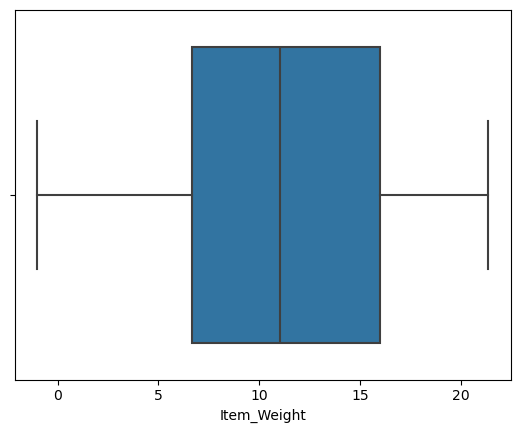

In [333]:
sns.boxplot(x=data.Item_Weight)

In [334]:
med=data["Item_Weight"].fillna(data.Item_Weight.median())

<Axes: xlabel='Item_Weight'>

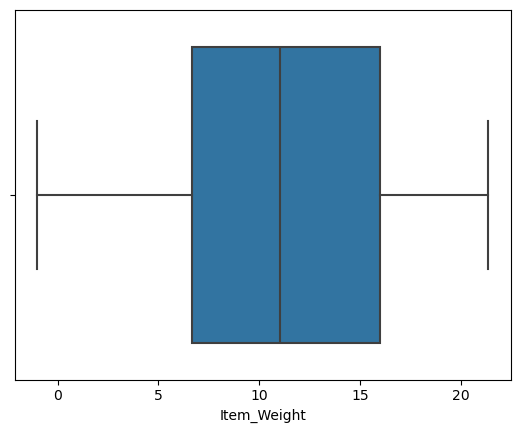

In [335]:
sns.boxplot(x=med)

In [336]:
data.Item_Weight=data["Item_Weight"]

In [337]:

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,0.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,0.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,0.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,-1.0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052


# drop the columns of Identifiers

In [338]:
data.drop(["Item_Identifier"],axis=1,inplace=True)

In [339]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,0.0,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,0.0,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,0.0,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,-1.0,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,2.0,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,-1.0,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,1.0,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,0.0,Tier 3,Supermarket Type2,1845.5976


# Information about the dataset

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   float64
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 732.6+ KB


# Check the catogrical coloum

In [341]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.max()-data.Outlet_Establishment_Year

In [342]:
data.rename(columns={"Outlet_Establishment_Year":"Outlet_Age"},inplace=True)

In [343]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,10,0.0,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,0.0,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,10,0.0,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,11,-1.0,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,22,2.0,Tier 3,Supermarket Type1,994.7052


In [344]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,11.168133,0.216121,2181.288914
std,6.720742,0.051598,62.275067,8.371760,0.976604,1706.499616
min,-1.000000,0.000000,31.290000,0.000000,-1.000000,33.290000
25%,6.650000,0.026989,93.826500,5.000000,-1.000000,834.247400
50%,11.000000,0.053931,143.012800,10.000000,0.000000,1794.331000
75%,16.000000,0.094585,185.643700,22.000000,1.000000,3101.296400
max,21.350000,0.328391,266.888400,24.000000,2.000000,13086.964800


# Check the outliers 

<Axes: xlabel='Item_Weight'>

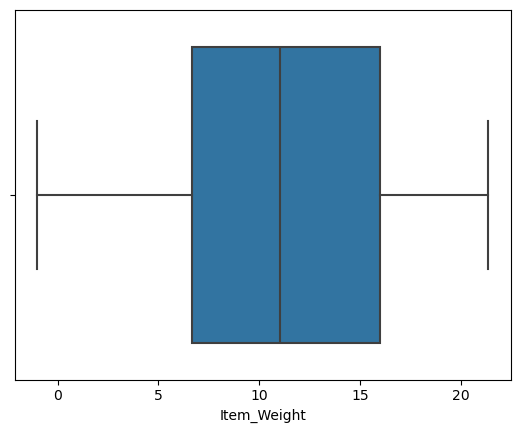

In [345]:
sns.boxplot(data=data,x="Item_Weight")

<Axes: xlabel='Item_MRP'>

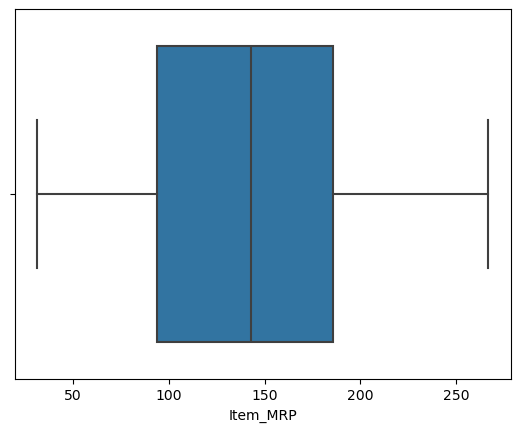

In [346]:
sns.boxplot(data=data,x='Item_MRP')

<Axes: xlabel='Item_Outlet_Sales'>

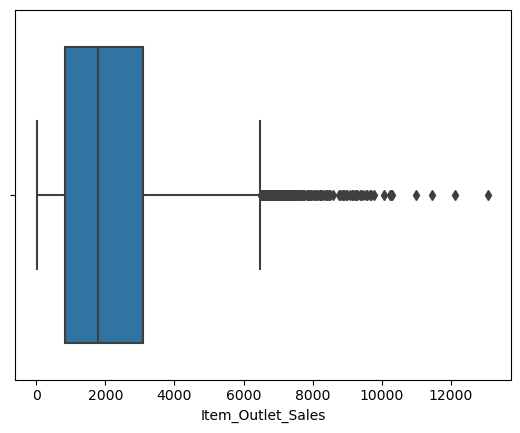

In [347]:
sns.boxplot(data=data,x='Item_Outlet_Sales')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

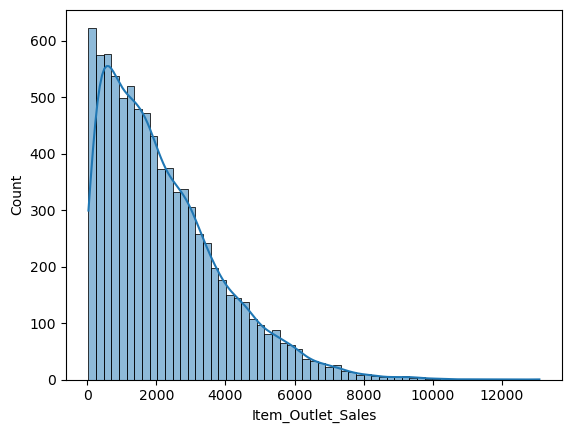

In [348]:
sns.histplot(data=data,x='Item_Outlet_Sales',kde=True)

# remove the outliers 

In [349]:
sales=np.cbrt(data["Item_Outlet_Sales"])

<Axes: xlabel='Item_Outlet_Sales'>

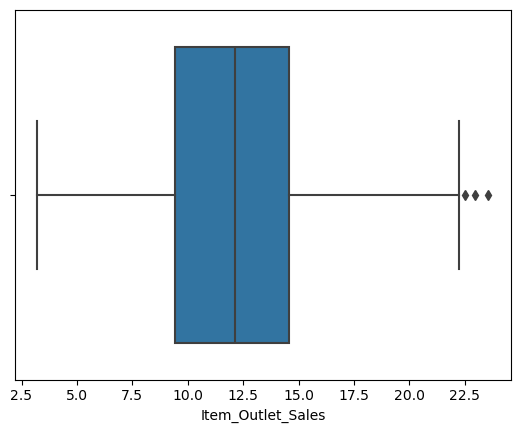

In [350]:
sns.boxplot(x=sales)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

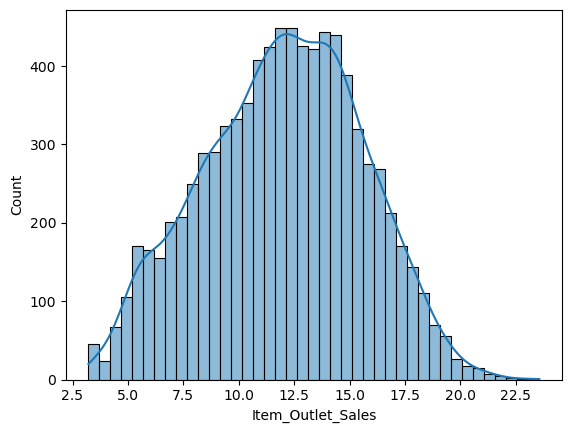

In [351]:
sns.histplot(x=sales,kde=True)

In [352]:
Q1=np.percentile(sales,25)

In [353]:
Q2=np.percentile(sales,75)

In [354]:
iqr=Q2-Q1

In [355]:
lower_bound=Q1-1.5*iqr

In [356]:
upper_bound=Q2+1.5*iqr

In [357]:
outliers_sales=sales[(sales>upper_bound) | (sales<lower_bound)]

In [358]:
outliers_sales

1450    22.535813
5223    22.968805
7188    23.565662
Name: Item_Outlet_Sales, dtype: float64

In [359]:
data["Item_Outlet_Sales"] = sales

In [360]:
index_outliers=data[(data["Item_Outlet_Sales"]>upper_bound) | (data["Item_Outlet_Sales"]<lower_bound)].index

In [361]:
data.drop(index_outliers,axis=0,inplace=True)

<Axes: xlabel='Item_Outlet_Sales'>

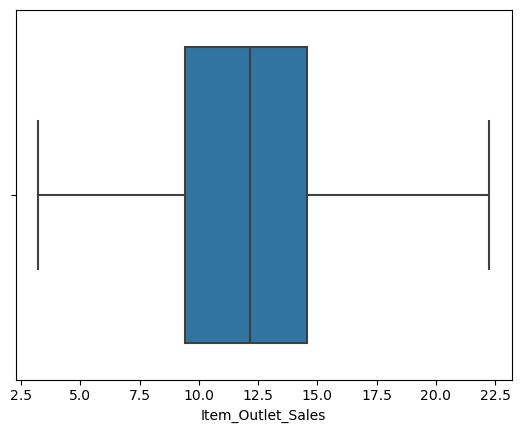

In [362]:
sns.boxplot(data=data,x="Item_Outlet_Sales")

In [363]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,10,0.0,Tier 1,Supermarket Type1,15.515611
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,0.0,Tier 3,Supermarket Type2,7.625576
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,10,0.0,Tier 1,Supermarket Type1,12.800240
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,11,-1.0,Tier 3,Grocery Store,9.013888
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,22,2.0,Tier 3,Supermarket Type1,9.982319
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,22,2.0,Tier 3,Supermarket Type1,14.058233
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,7,-1.0,Tier 2,Supermarket Type1,8.189661
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,5,1.0,Tier 2,Supermarket Type1,10.606219
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,0,0.0,Tier 3,Supermarket Type2,12.266265


In [364]:
a=data.copy()

# Encoding

One hot encoding

In [365]:
df=pd.get_dummies(data[["Item_Type","Outlet_Identifier","Item_Fat_Content"]],drop_first=True)

In [366]:
df

,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Regular
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
8520,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [367]:
data.drop(["Item_Type","Outlet_Identifier","Item_Fat_Content"],axis=1,inplace=True)

In [368]:
data=data.join(df)

In [369]:
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Regular
0,9.300,0.016047,249.8092,10,0.0,Tier 1,Supermarket Type1,15.515611,False,False,...,False,False,False,False,False,False,False,False,True,False
1,5.920,0.019278,48.2692,0,0.0,Tier 3,Supermarket Type2,7.625576,False,False,...,False,False,True,False,False,False,False,False,False,True
2,17.500,0.016760,141.6180,10,0.0,Tier 1,Supermarket Type1,12.800240,False,False,...,False,False,False,False,False,False,False,False,True,False
3,19.200,0.000000,182.0950,11,-1.0,Tier 3,Grocery Store,9.013888,False,False,...,False,False,False,False,False,False,False,False,False,True
4,8.930,0.000000,53.8614,22,2.0,Tier 3,Supermarket Type1,9.982319,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,22,2.0,Tier 3,Supermarket Type1,14.058233,False,False,...,True,False,False,False,False,False,False,False,False,False
8519,8.380,0.046982,108.1570,7,-1.0,Tier 2,Supermarket Type1,8.189661,False,False,...,False,False,False,False,False,False,True,False,False,True
8520,10.600,0.035186,85.1224,5,1.0,Tier 2,Supermarket Type1,10.606219,False,False,...,False,False,False,False,False,True,False,False,False,False
8521,7.210,0.145221,103.1332,0,0.0,Tier 3,Supermarket Type2,12.266265,False,False,...,False,False,True,False,False,False,False,False,False,True


Ordinal encoding

In [370]:
encoding=OrdinalEncoder(categories=[["Tier 3","Tier 2","Tier 1"]])

In [371]:
data.Outlet_Location_Type = encoding.fit_transform(data.Outlet_Location_Type.values.reshape(-1,1))

In [372]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Regular
0,9.30,0.016047,249.8092,10,0.0,2.0,Supermarket Type1,15.515611,False,False,...,False,False,False,False,False,False,False,False,True,False
1,5.92,0.019278,48.2692,0,0.0,0.0,Supermarket Type2,7.625576,False,False,...,False,False,True,False,False,False,False,False,False,True
2,17.50,0.016760,141.6180,10,0.0,2.0,Supermarket Type1,12.800240,False,False,...,False,False,False,False,False,False,False,False,True,False
3,19.20,0.000000,182.0950,11,-1.0,0.0,Grocery Store,9.013888,False,False,...,False,False,False,False,False,False,False,False,False,True
4,8.93,0.000000,53.8614,22,2.0,0.0,Supermarket Type1,9.982319,False,False,...,True,False,False,False,False,False,False,False,False,False


In [373]:
data.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     932
Supermarket Type2     928
Name: count, dtype: int64

In [374]:
data.Outlet_Type.groupby([data.Outlet_Type,data.Outlet_Location_Type]).count()

Outlet_Type        Outlet_Location_Type
Grocery Store      0.0                      555
                   2.0                      528
Supermarket Type1  0.0                      932
                   1.0                     2785
                   2.0                     1860
Supermarket Type2  0.0                      928
Supermarket Type3  0.0                      932
Name: Outlet_Type, dtype: int64

In [375]:
encoding=OrdinalEncoder(categories=[["Grocery Store","Supermarket Type3","Supermarket Type2","Supermarket Type1"]])

In [376]:
data.Outlet_Type = encoding.fit_transform(data.Outlet_Type.values.reshape(-1,1))

In [377]:
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Regular
0,9.300,0.016047,249.8092,10,0.0,2.0,3.0,15.515611,False,False,...,False,False,False,False,False,False,False,False,True,False
1,5.920,0.019278,48.2692,0,0.0,0.0,2.0,7.625576,False,False,...,False,False,True,False,False,False,False,False,False,True
2,17.500,0.016760,141.6180,10,0.0,2.0,3.0,12.800240,False,False,...,False,False,False,False,False,False,False,False,True,False
3,19.200,0.000000,182.0950,11,-1.0,0.0,0.0,9.013888,False,False,...,False,False,False,False,False,False,False,False,False,True
4,8.930,0.000000,53.8614,22,2.0,0.0,3.0,9.982319,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,22,2.0,0.0,3.0,14.058233,False,False,...,True,False,False,False,False,False,False,False,False,False
8519,8.380,0.046982,108.1570,7,-1.0,1.0,3.0,8.189661,False,False,...,False,False,False,False,False,False,True,False,False,True
8520,10.600,0.035186,85.1224,5,1.0,1.0,3.0,10.606219,False,False,...,False,False,False,False,False,True,False,False,False,False
8521,7.210,0.145221,103.1332,0,0.0,0.0,2.0,12.266265,False,False,...,False,False,True,False,False,False,False,False,False,True


In [378]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8520.0,10.482978,6.718472,-1.000000,6.650000,11.000000,16.000000,21.350000
Item_Visibility,8520.0,0.066152,0.051595,0.000000,0.027027,0.053945,0.094618,0.328391
Item_MRP,8520.0,140.956666,62.256119,31.290000,93.802150,142.931200,185.600300,266.888400
Outlet_Age,8520.0,11.163615,8.369770,0.000000,5.000000,10.000000,22.000000,24.000000
Outlet_Size,8520.0,0.216197,0.976768,-1.000000,-1.000000,0.000000,1.000000,2.000000
Outlet_Location_Type,8520.0,0.887441,0.812730,0.000000,0.000000,1.000000,2.000000,2.000000
Outlet_Type,8520.0,2.290962,1.089907,0.000000,2.000000,3.000000,3.000000,3.000000
Item_Outlet_Sales,8520.0,11.987955,3.576568,3.216903,9.410668,12.151620,14.580942,22.235547


# Standarization

In [379]:
from sklearn.preprocessing import StandardScaler

In [380]:
sd = StandardScaler().fit(data)

In [381]:
datastd = sd.transform(data)

In [382]:
type(datastd)

numpy.ndarray

In [383]:
datastd

array([[-0.17608882, -0.97117338,  1.74856583, ..., -0.35004235,
         2.85679721, -0.73815825],
       [-0.67920896, -0.90854944, -1.48889632, ..., -0.35004235,
        -0.35004235,  1.35472305],
       [ 1.04449851, -0.95735787,  0.01062341, ..., -0.35004235,
         2.85679721, -0.73815825],
       ...,
       [ 0.01741893, -0.60020796, -0.89690049, ..., -0.35004235,
        -0.35004235, -0.73815825],
       [-0.48718973,  1.53255818, -0.60758182, ..., -0.35004235,
        -0.35004235,  1.35472305],
       [ 0.6425978 , -0.41235041, -1.05200117, ...,  2.85679721,
        -0.35004235, -0.73815825]])

In [384]:
dataStd = pd.DataFrame(datastd,columns=data.columns)

In [385]:
type(dataStd)

pandas.core.frame.DataFrame

In [386]:
dataStd

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Regular
0,-0.176089,-0.971173,1.748566,-0.139034,-0.221352,1.368996,0.650587,0.986382,-0.174225,-0.114366,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,2.856797,-0.738158
1,-0.679209,-0.908549,-1.488896,-1.333880,-0.221352,-1.091990,-0.266976,-1.219782,-0.174225,-0.114366,...,-0.350465,-0.349197,2.860251,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,1.354723
2,1.044499,-0.957358,0.010623,-0.139034,-0.221352,1.368996,0.650587,0.227126,-0.174225,-0.114366,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,2.856797,-0.738158
3,1.297547,-1.282214,0.660831,-0.019549,-1.245197,-1.091990,-2.102102,-0.831591,-0.174225,-0.114366,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,1.354723
4,-0.231164,-1.282214,-1.399065,1.294781,1.826338,-1.091990,0.650587,-0.560804,-0.174225,-0.114366,...,2.853354,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,-0.738158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,-0.538544,-0.181597,1.181722,1.294781,1.826338,-1.091990,0.650587,0.578879,-0.174225,-0.114366,...,2.853354,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,-0.738158
8516,-0.313033,-0.371566,-0.526881,-0.497488,-1.245197,0.138503,0.650587,-1.062056,-0.174225,-0.114366,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,2.858523,-0.350042,-0.350042,1.354723
8517,0.017419,-0.600208,-0.896900,-0.736457,0.802493,0.138503,0.650587,-0.386353,-0.174225,-0.114366,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,2.856797,-0.349831,-0.350042,-0.350042,-0.738158
8518,-0.487190,1.532558,-0.607582,-1.333880,-0.221352,-1.091990,-0.266976,0.077819,-0.174225,-0.114366,...,-0.350465,-0.349197,2.860251,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,1.354723


# Check the correlation for Feature Selection

In [387]:
corrdata = dataStd.corr()

In [388]:
corrdata

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Regular
Item_Weight,1.000000,-0.080105,0.023381,-0.536917,-0.044592,0.068826,0.534283,0.020401,-0.037553,-0.005843,...,0.131627,0.121822,0.124399,-0.439338,-0.599037,0.122257,0.112843,0.124208,0.126847,-0.011316
Item_Visibility,-0.080105,1.000000,-0.000661,0.075487,-0.020855,0.027680,-0.223881,-0.172132,0.000347,0.043383,...,-0.042086,-0.032325,-0.034817,0.210684,-0.050103,-0.033171,-0.038500,-0.038592,-0.036277,0.047288
Item_MRP,0.023381,-0.000661,1.000000,-0.005914,0.009309,0.000401,0.007363,0.551015,-0.000011,0.001528,...,0.002642,-0.008613,0.004055,-0.004829,-0.008382,0.012178,-0.000036,0.006189,-0.003705,0.006094
Outlet_Age,-0.536917,0.075487,-0.005914,1.000000,0.494886,-0.088683,-0.432717,-0.031875,0.003727,0.006833,...,0.453775,-0.382339,-0.466351,0.394225,0.537525,-0.257791,-0.174037,0.034982,-0.048668,-0.003131
Outlet_Size,-0.044592,-0.020855,0.009309,0.494886,1.000000,0.052690,0.152940,0.049363,-0.003742,0.001297,...,0.640067,-0.434819,-0.077389,0.206267,-0.077576,0.280906,-0.435609,0.280906,-0.077483,-0.001930
Outlet_Location_Type,0.068826,0.027680,0.000401,-0.088683,0.052690,1.000000,0.290617,-0.070657,-0.004055,0.000488,...,-0.382704,0.048365,-0.381781,0.351877,-0.382704,0.048482,0.048453,0.479206,0.479206,0.001584
Outlet_Type,0.534283,-0.223881,0.007363,-0.432717,0.152940,0.290617,1.000000,0.373535,-0.006389,-0.012407,...,0.228008,0.227183,-0.093340,-0.540310,-0.415139,0.227733,0.227595,0.227733,0.227733,0.001951
Item_Outlet_Sales,0.020401,-0.172132,0.551015,-0.031875,0.049363,-0.070657,0.373535,1.000000,0.005902,-0.012245,...,0.049506,0.061746,-0.008133,-0.388242,0.278151,0.082665,0.035947,0.052700,0.065298,0.016228
Item_Type_Breads,-0.037553,0.000347,-0.000011,0.003727,-0.003742,-0.004055,-0.006389,0.005902,1.000000,-0.019925,...,-0.005464,-0.011775,-0.000755,0.001281,0.007880,0.003566,0.012541,-0.003112,-0.005338,0.032646
Item_Type_Breakfast,-0.005843,0.043383,0.001528,0.006833,0.001297,0.000488,-0.012407,-0.012245,-0.019925,1.000000,...,0.003222,0.000149,0.000063,0.013726,-0.003440,-0.006692,-0.006652,-0.006692,0.003311,0.065721


<Axes: >

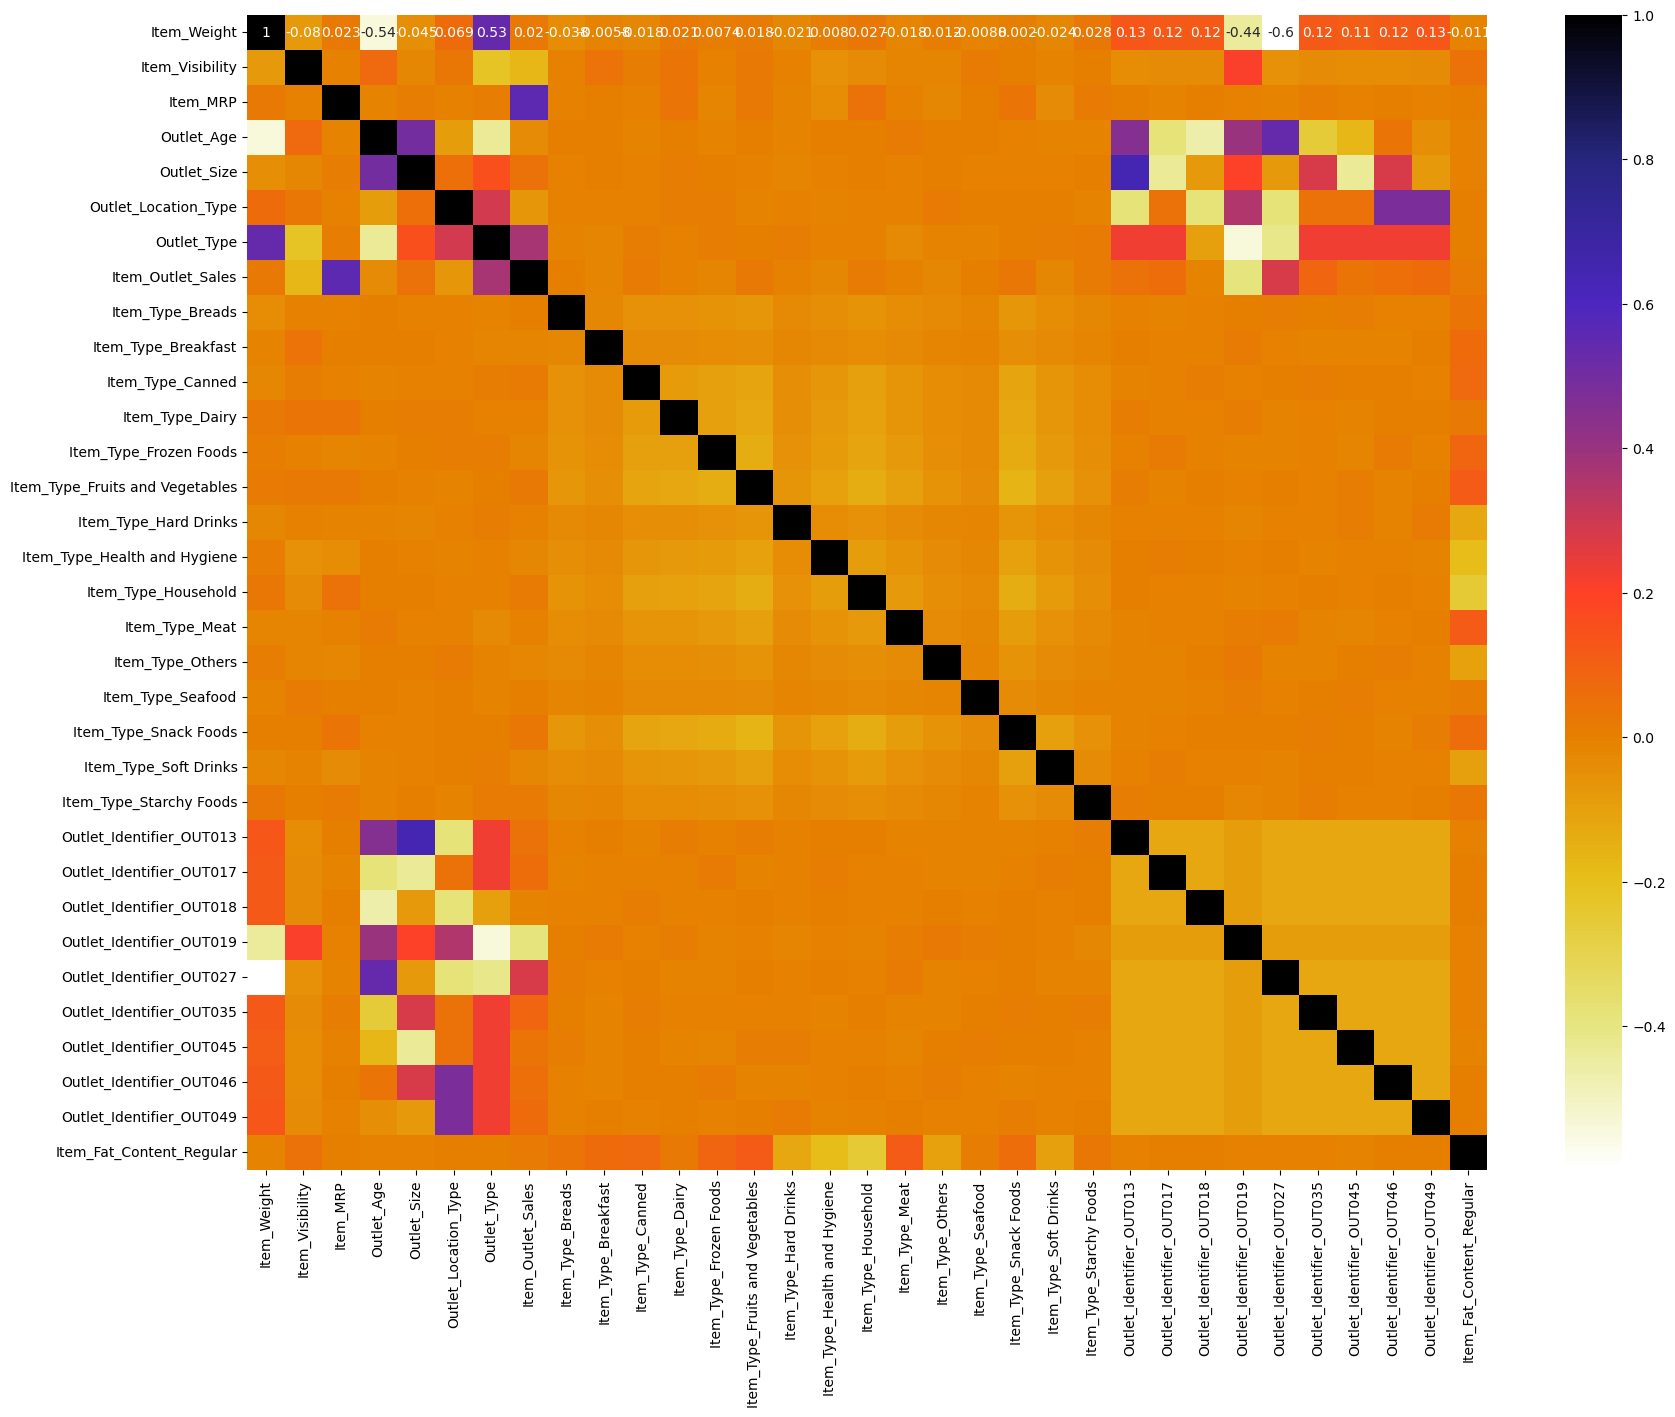

In [389]:
plt.figure(figsize=(20,15))
sns.heatmap(corrdata,annot=True,cmap='CMRmap_r')

In [390]:
cat_cols=a.select_dtypes(include=['object']).columns
num_cols = a.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Numerical Variables:
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age', 'Outlet_Size', 'Item_Outlet_Sales']


In [391]:
a

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,10,0.0,Tier 1,Supermarket Type1,15.515611
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,0.0,Tier 3,Supermarket Type2,7.625576
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,10,0.0,Tier 1,Supermarket Type1,12.800240
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,11,-1.0,Tier 3,Grocery Store,9.013888
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,22,2.0,Tier 3,Supermarket Type1,9.982319
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,22,2.0,Tier 3,Supermarket Type1,14.058233
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,7,-1.0,Tier 2,Supermarket Type1,8.189661
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,5,1.0,Tier 2,Supermarket Type1,10.606219
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,0,0.0,Tier 3,Supermarket Type2,12.266265


# EDA Univariate Analysis

Item_Weight
Skew : -0.38


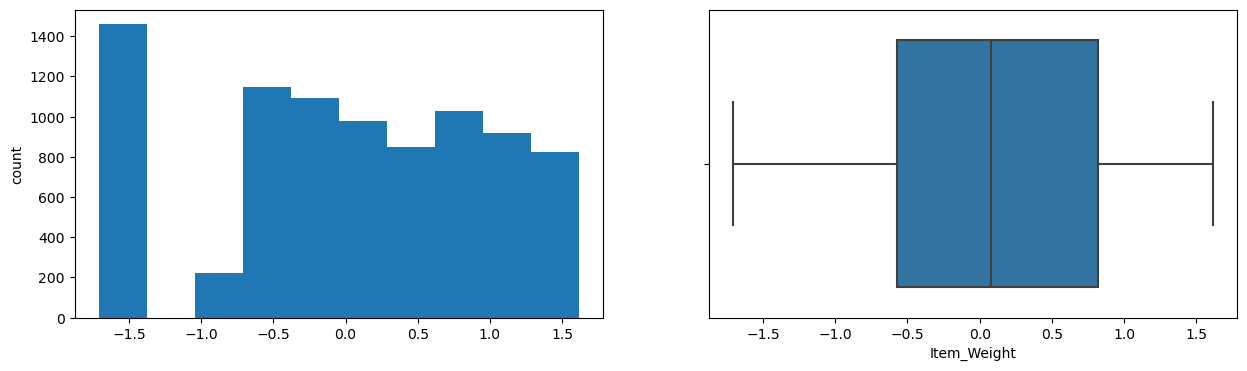

In [392]:
print("Item_Weight")
print('Skew :', round(dataStd["Item_Weight"].skew(), 2))
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
dataStd["Item_Weight"].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=dataStd.Item_Weight)
plt.show()

Item_MRP
Skew : 0.13


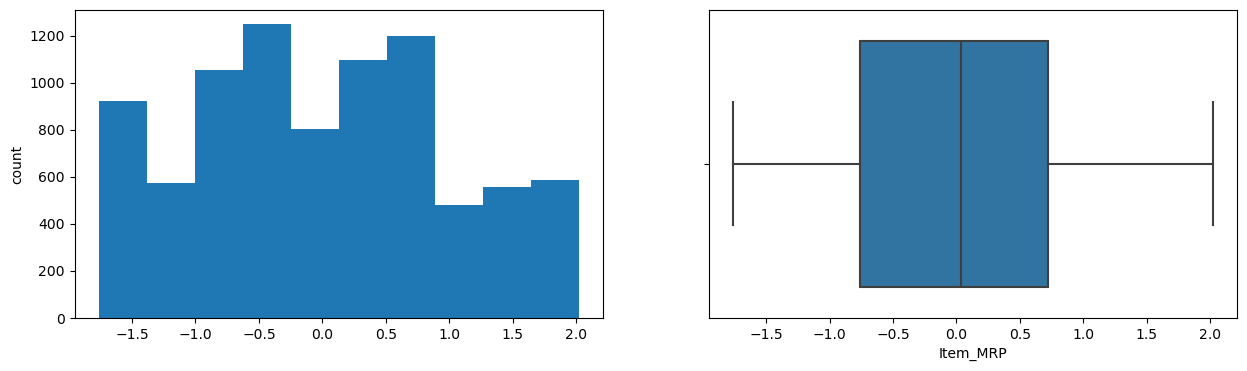

In [393]:
print("Item_MRP")
print('Skew :', round(dataStd["Item_MRP"].skew(), 2))
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
dataStd["Item_MRP"].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=dataStd.Item_MRP)
plt.show()

Outlet_Age
Skew : 0.4


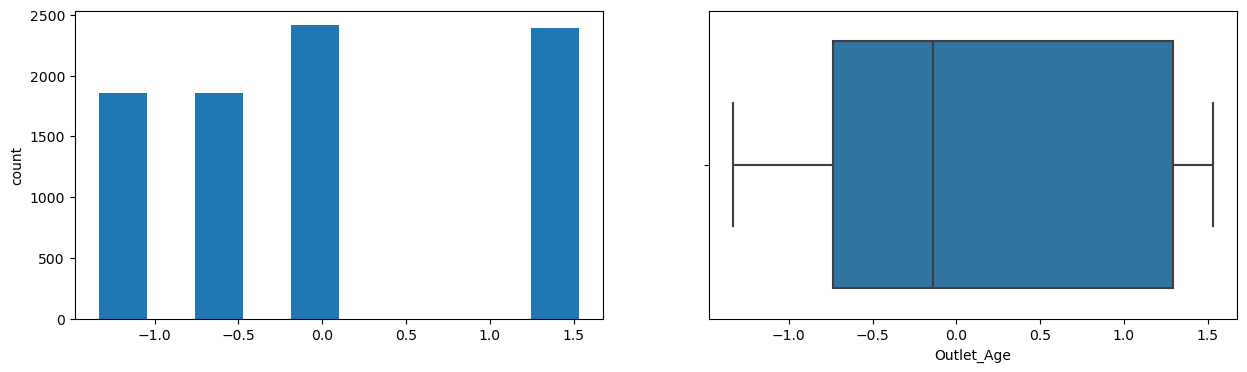

In [394]:
print("Outlet_Age")
print('Skew :', round(dataStd["Outlet_Age"].skew(), 2))
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
dataStd["Outlet_Age"].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=dataStd.Outlet_Age)
plt.show()

Item_Outlet_Sales
Skew : -0.11


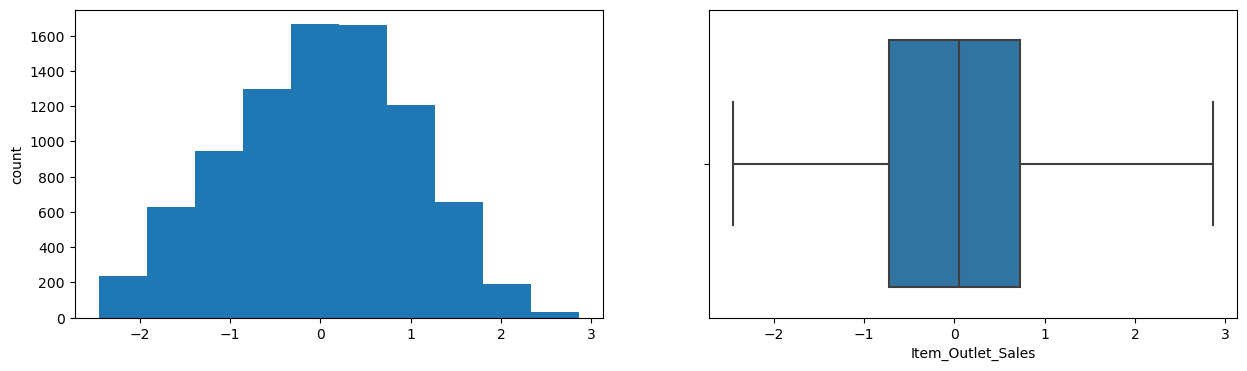

In [395]:
print("Item_Outlet_Sales")
print('Skew :', round(dataStd["Item_Outlet_Sales"].skew(), 2))
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
dataStd["Item_Outlet_Sales"].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=dataStd.Item_Outlet_Sales)
plt.show()

# EDA Bivariate Analysis

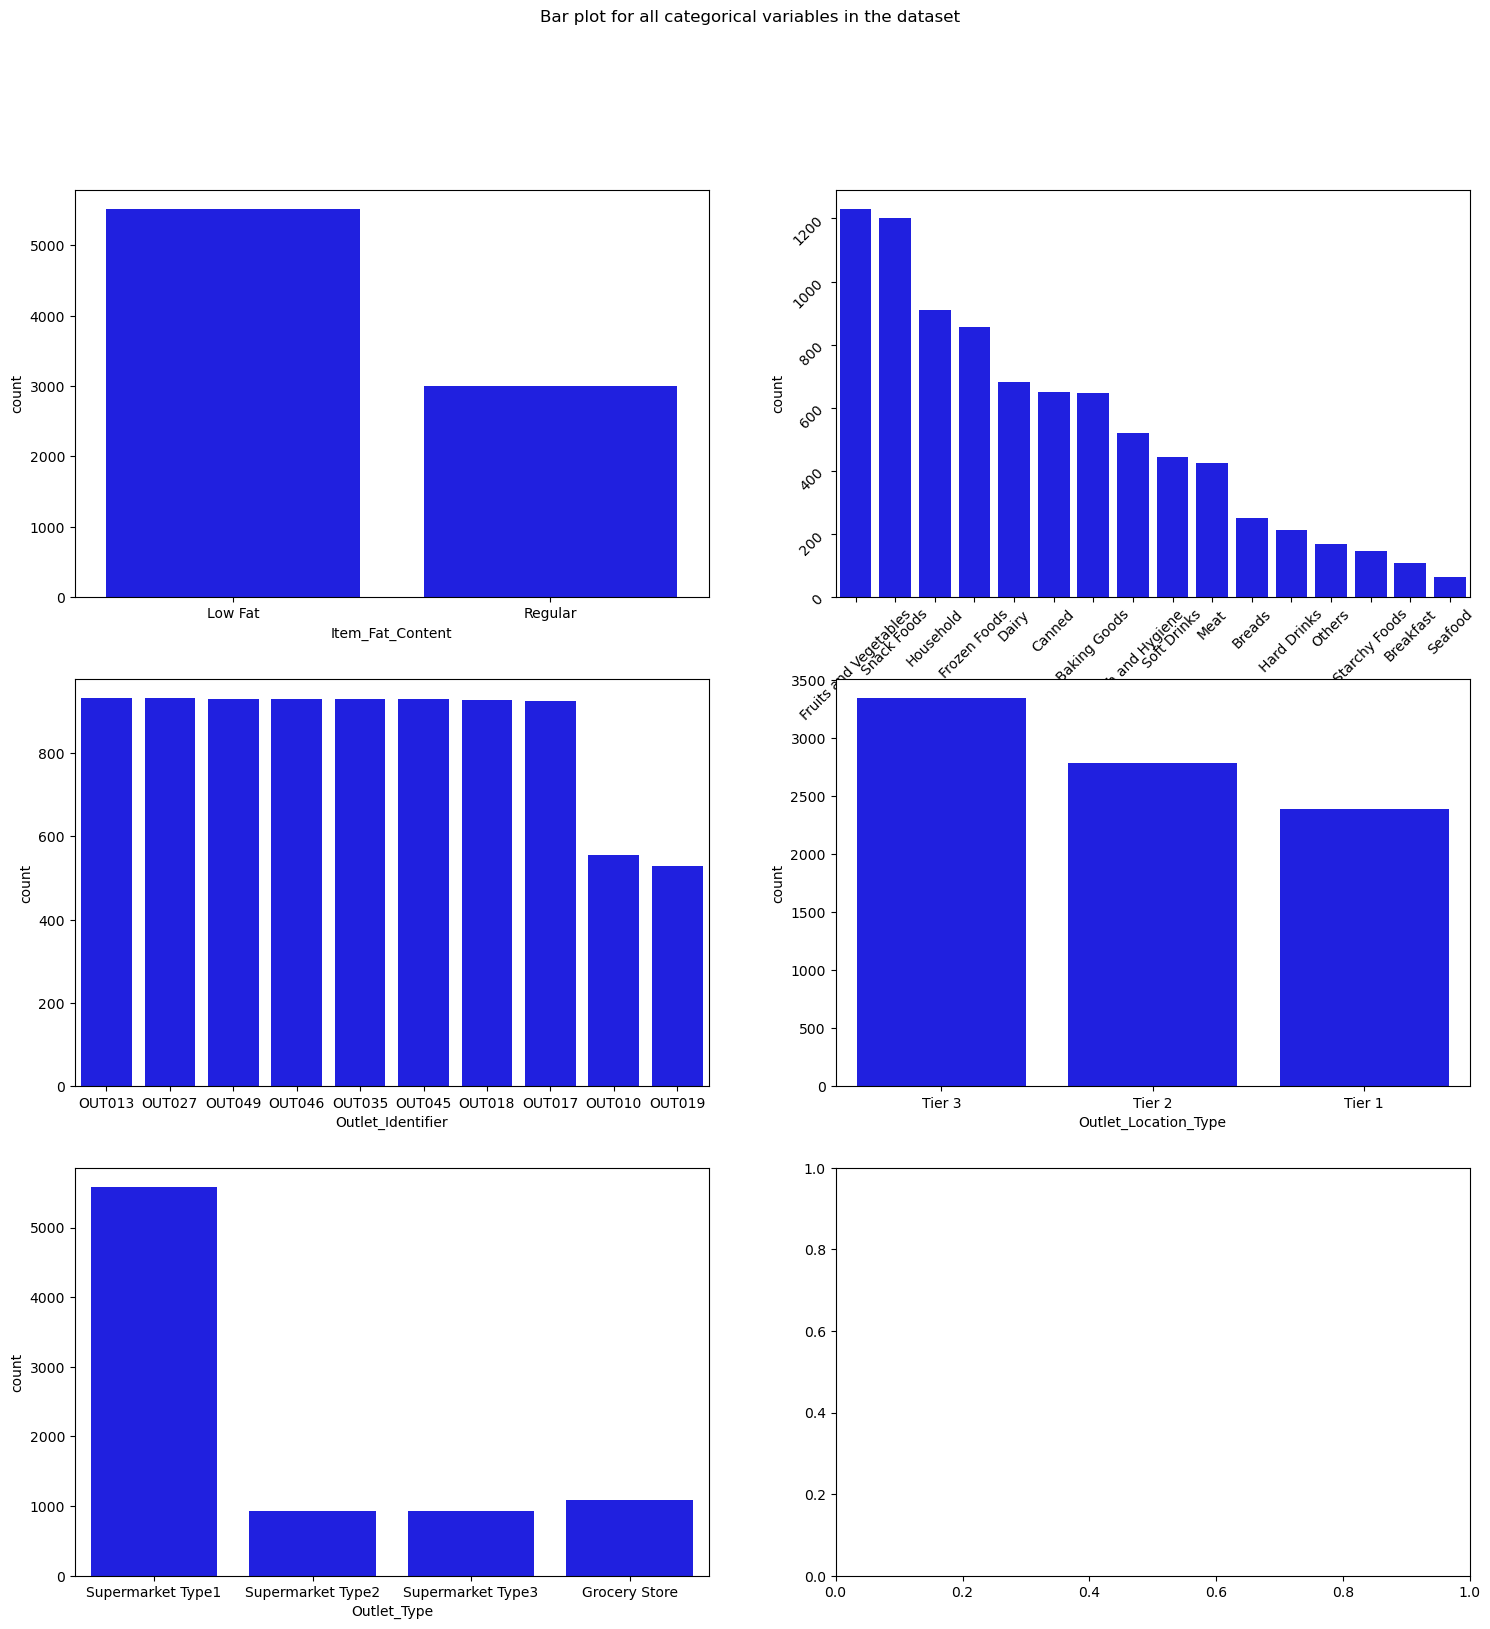

In [396]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Item_Fat_Content', data = a, color = 'blue', 
              order = a['Item_Fat_Content'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Item_Type', data = a, color = 'blue', 
              order = a['Item_Type'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Outlet_Identifier', data = a, color = 'blue', 
              order = a['Outlet_Identifier'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Outlet_Location_Type', data = a, color = 'blue', 
              order = a['Outlet_Location_Type'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Outlet_Type', data = a, color = 'blue', 
              order = a['Outlet_Type'].head(20).value_counts().index);
axes[0][1].tick_params(labelrotation=45);
#axes[2][0].tick_params(labelrotation=90);
#axes[2][1].tick_params(labelrotation=90);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1300x1700 with 0 Axes>

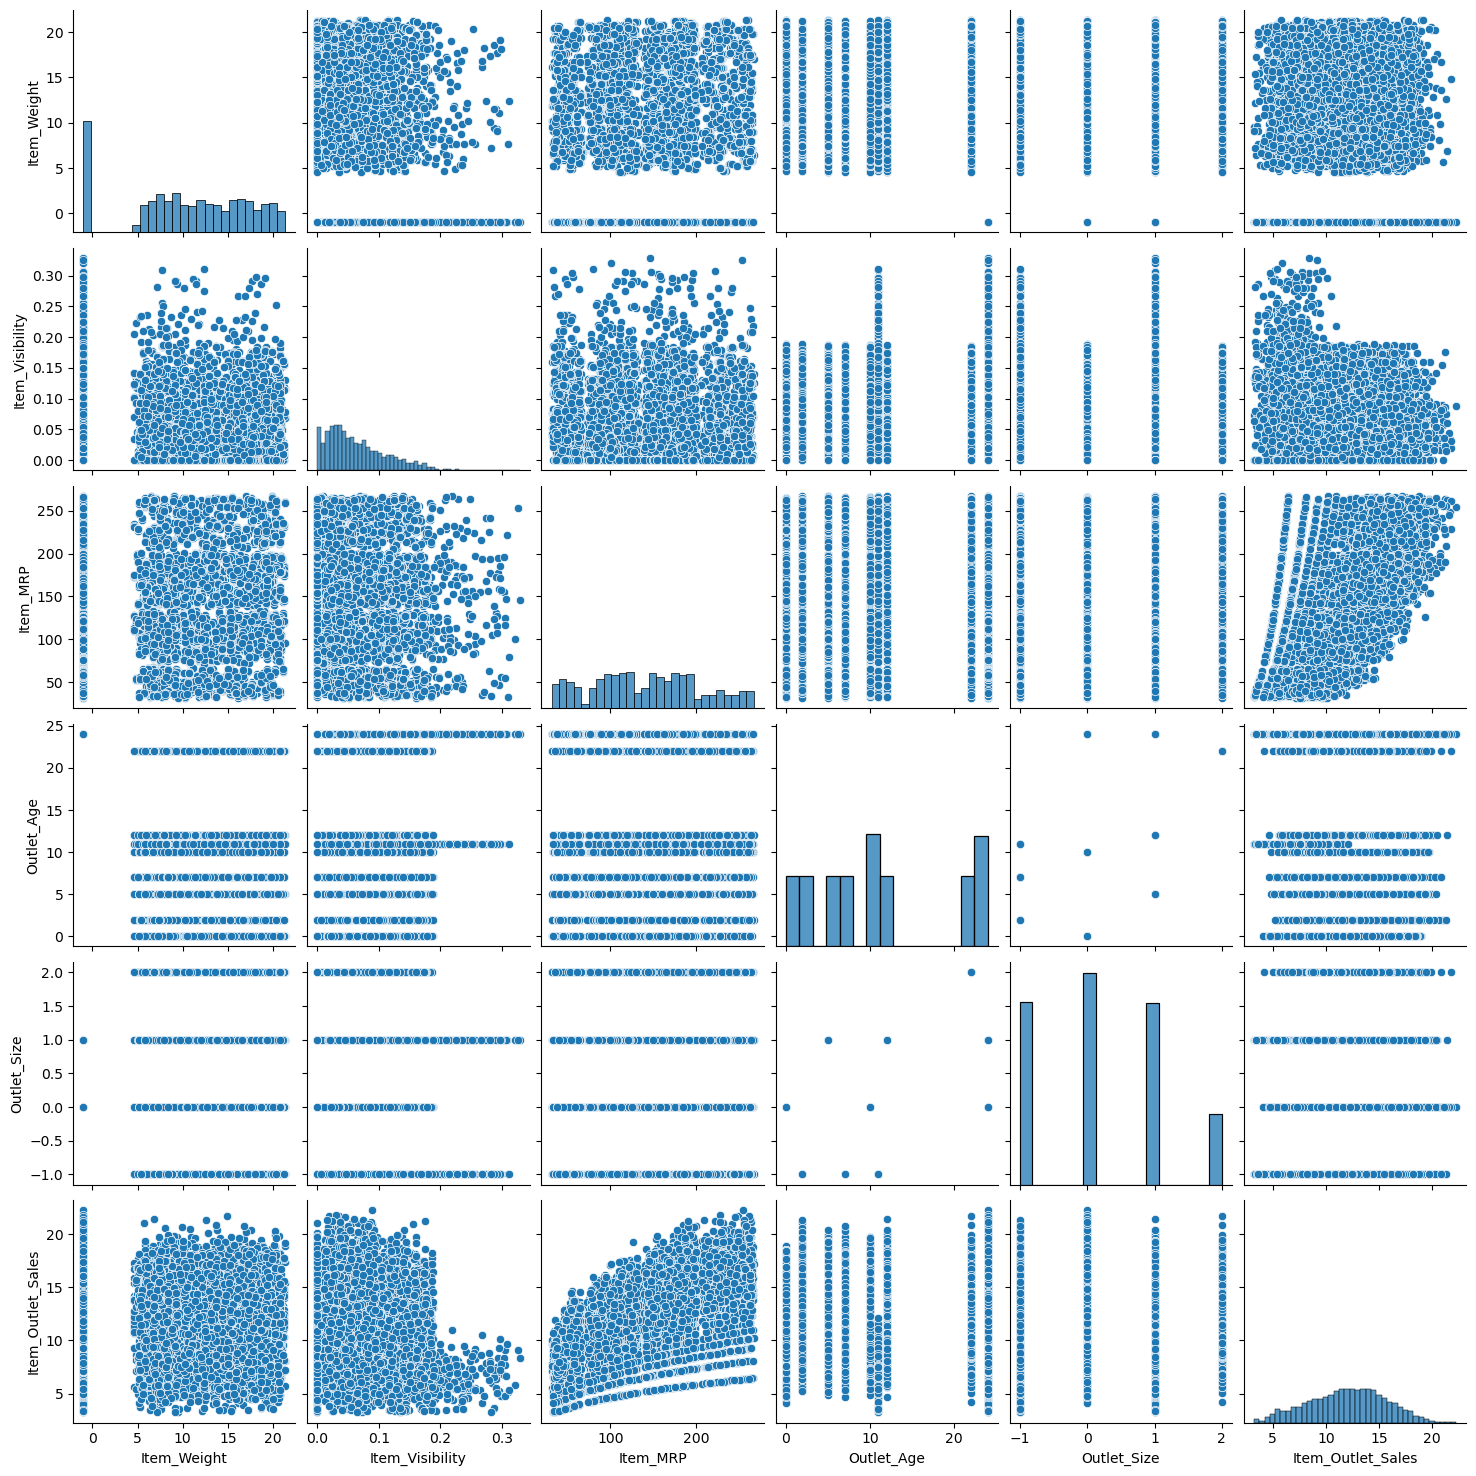

In [397]:
plt.figure(figsize=(13,17))
sns.pairplot(data=a)
plt.show()

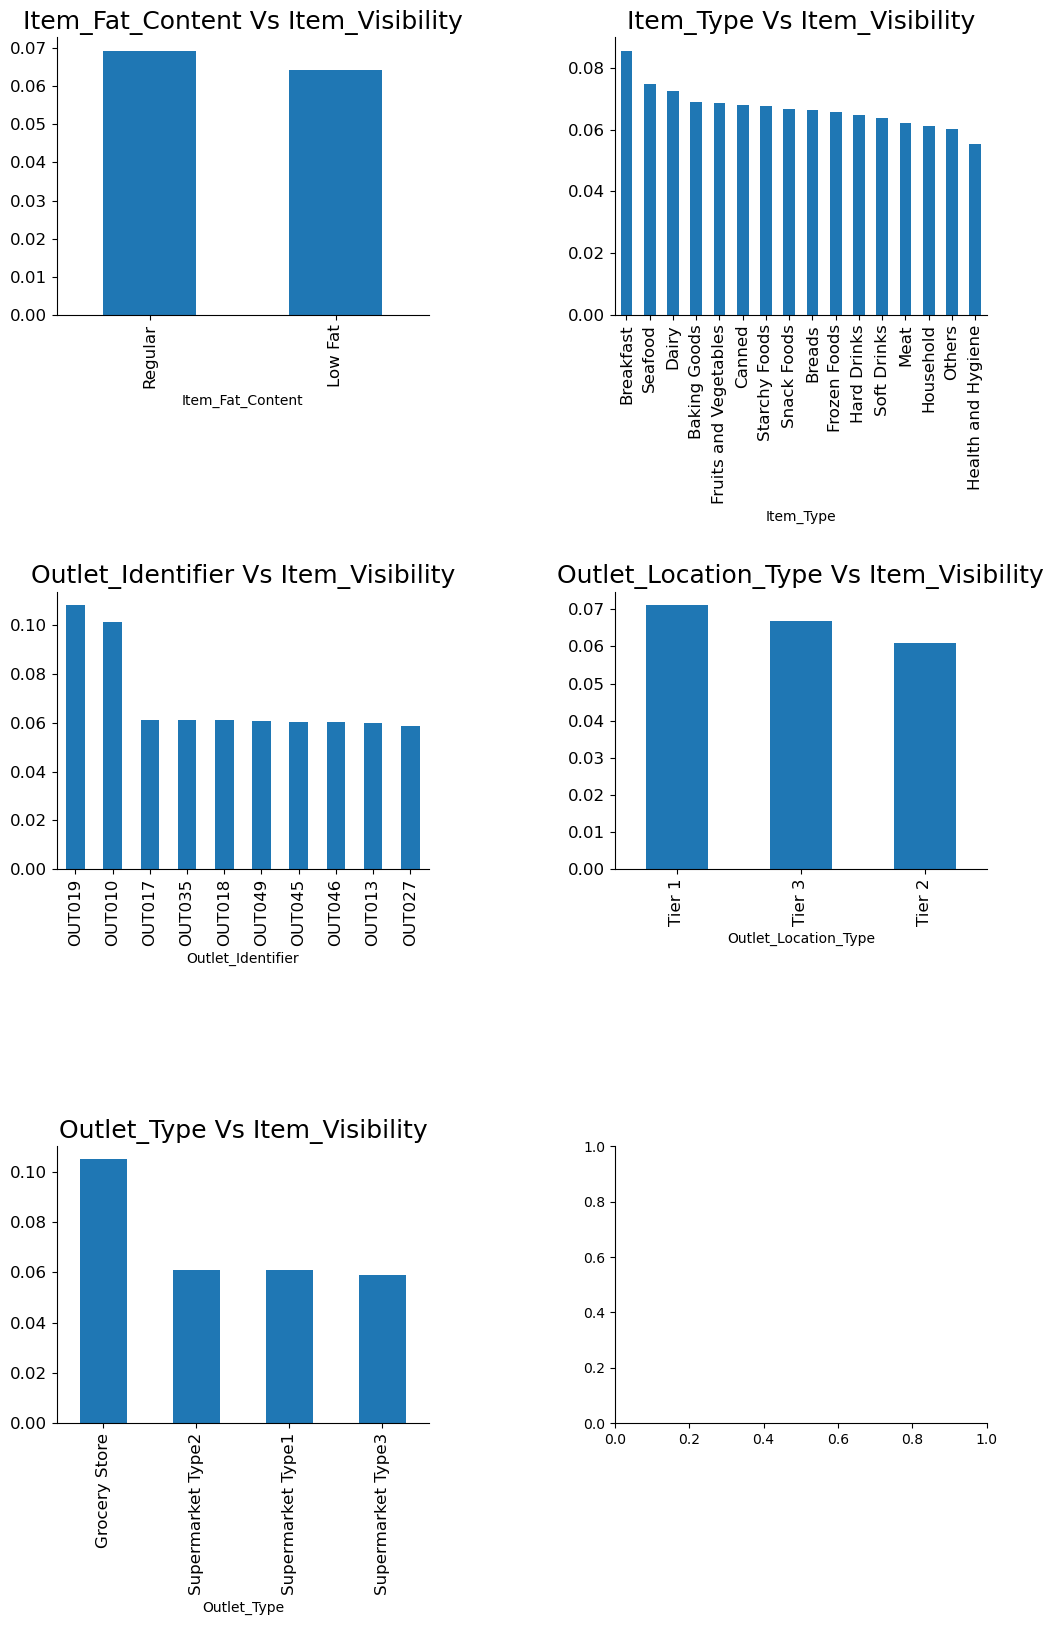

In [398]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 18))
a.groupby('Item_Fat_Content')['Item_Visibility'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Item_Fat_Content Vs Item_Visibility", fontsize=18)
a.groupby('Item_Type')['Item_Visibility'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Item_Type Vs Item_Visibility", fontsize=18)
a.groupby('Outlet_Identifier')['Item_Visibility'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Outlet_Identifier Vs Item_Visibility", fontsize=18)
a.groupby('Outlet_Location_Type')['Item_Visibility'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Outlet_Location_Type Vs Item_Visibility", fontsize=18)
a.groupby('Outlet_Type')['Item_Visibility'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Outlet_Type Vs Item_Visibility", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [399]:
dataStd

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Regular
0,-0.176089,-0.971173,1.748566,-0.139034,-0.221352,1.368996,0.650587,0.986382,-0.174225,-0.114366,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,2.856797,-0.738158
1,-0.679209,-0.908549,-1.488896,-1.333880,-0.221352,-1.091990,-0.266976,-1.219782,-0.174225,-0.114366,...,-0.350465,-0.349197,2.860251,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,1.354723
2,1.044499,-0.957358,0.010623,-0.139034,-0.221352,1.368996,0.650587,0.227126,-0.174225,-0.114366,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,2.856797,-0.738158
3,1.297547,-1.282214,0.660831,-0.019549,-1.245197,-1.091990,-2.102102,-0.831591,-0.174225,-0.114366,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,1.354723
4,-0.231164,-1.282214,-1.399065,1.294781,1.826338,-1.091990,0.650587,-0.560804,-0.174225,-0.114366,...,2.853354,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,-0.738158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,-0.538544,-0.181597,1.181722,1.294781,1.826338,-1.091990,0.650587,0.578879,-0.174225,-0.114366,...,2.853354,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,-0.738158
8516,-0.313033,-0.371566,-0.526881,-0.497488,-1.245197,0.138503,0.650587,-1.062056,-0.174225,-0.114366,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,2.858523,-0.350042,-0.350042,1.354723
8517,0.017419,-0.600208,-0.896900,-0.736457,0.802493,0.138503,0.650587,-0.386353,-0.174225,-0.114366,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,2.856797,-0.349831,-0.350042,-0.350042,-0.738158
8518,-0.487190,1.532558,-0.607582,-1.333880,-0.221352,-1.091990,-0.266976,0.077819,-0.174225,-0.114366,...,-0.350465,-0.349197,2.860251,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,1.354723


# Statistic 

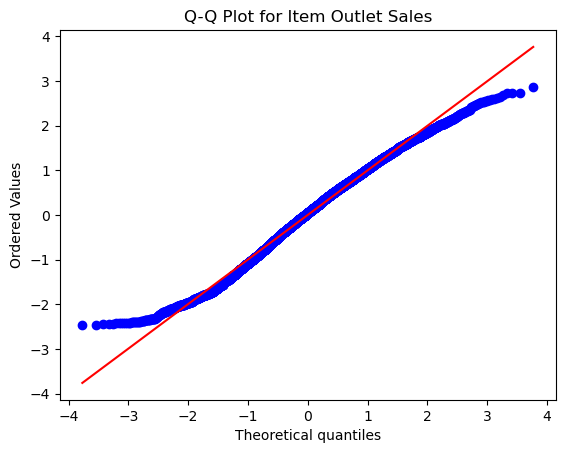

In [400]:
import scipy.stats as stats


# Q-Q plot for checking normality
stats.probplot(dataStd['Item_Outlet_Sales'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Item Outlet Sales')
plt.show()

In [401]:
# Skewness and Kurtosis
skewness = dataStd['Item_Outlet_Sales'].skew()
kurtosis = dataStd['Item_Outlet_Sales'].kurt()
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: -0.11012787831351198
Kurtosis: -0.5492276292340956


# find correlation between features

In [402]:
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
correlation_matrix = dataStd[numerical_cols].corr()
print("correlation Matrix:")
print(correlation_matrix)

correlation Matrix:
                   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
Item_Weight           1.000000        -0.080105  0.023381           0.020401
Item_Visibility      -0.080105         1.000000 -0.000661          -0.172132
Item_MRP              0.023381        -0.000661  1.000000           0.551015
Item_Outlet_Sales     0.020401        -0.172132  0.551015           1.000000


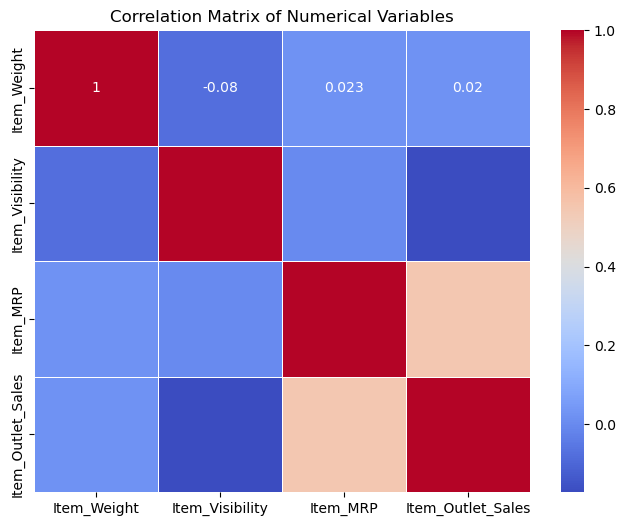

In [403]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

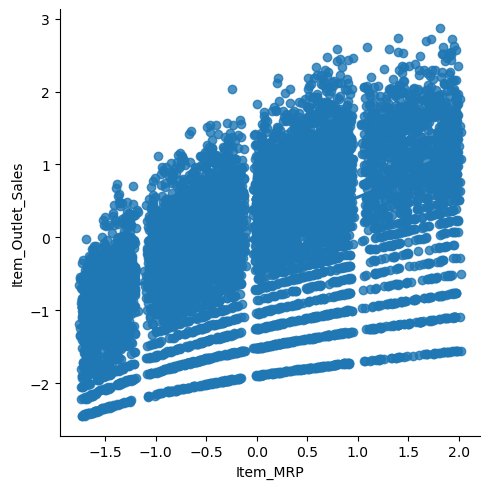

In [404]:
sns.lmplot(x="Item_MRP",y="Item_Outlet_Sales",data=dataStd) 
plt.show()

# hypothesis testing

# before performing any hypothesis test, its important to know which stat method we should use. statistical methods are divided into two parts.

## 1. parametric statistical methods
## 2. non-parametric statistical methods

## to know which one we should apply,we tests the normality in our data. if our data is specific distributed, such as the Gaussian distribution,we use parametric and if our data is not Gaussian or normally distributed, we use nonparametric stats methods.



Since our target variable is Item Visibility we can use hypothesis testing to solve various business problems related to item visibility in Our Data Set.

# PROBLEM STATEMENT 1ST:  Determine if different item types have a significant effect on item visibility. 

## Hypothesis : There is no significant difference in item visibility among different item types.

## Alternative Hypothesis : There is a significant difference in item visibility among different item types.

In [405]:
# performng normality test on item type and item visibility.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


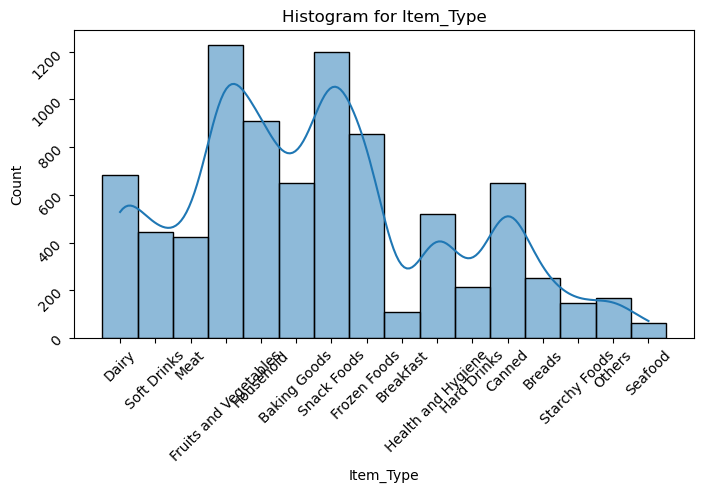

In [406]:
plt.figure(figsize=(8,4))
sns.histplot(a['Item_Type'], kde=True)
plt.tick_params(labelrotation=45);
plt.title('Histogram for Item_Type')
plt.show()

In [407]:
# Kolmogorov-Smirnov Test: to check the distribution in our data.

In [408]:
from scipy.stats import kstest, norm

# Compute the mean and standard deviation of the sample
mean_visibility = a['Item_Visibility'].mean()
std_visibility = a['Item_Visibility'].std()

# Perform the one-sample K-S test against a normal distribution
ks_statistic, p_value = kstest(a['Item_Visibility'], 'norm', args=(mean_visibility, std_visibility))

print(f"K-S Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


K-S Statistic: 0.09989702140758083
P-value: 1.8107402271625065e-74


Our data is not normally distributed.

Without mean and standard deviation adjustments, the K-S statistic (the maximum difference between the empirical and theoretical distributions) will likely be larger, and the p-value will be smaller. This will lead to rejecting the null hypothesis, even if your data is normally distributed but with different mean and standard deviation.

In [409]:
mean_visibility

0.06615239844706573

In [410]:
std_visibility

0.051595358160848884

in our case Item_Visibility data that has a mean of 0.06615 and a standard deviation of 0.0515. If you compare this to the standard normal distribution (mean = 0, std = 1), the K-S test will likely reject the hypothesis of normality, even if the data is close to normal for its actual distribution.

With mean and std: The K-S test will compare your data against a normal distribution with mean 0.25 and std 0.1, providing a more accurate result.

Without mean and std: The K-S test compares your data against a standard normal distribution (mean = 0, std = 1), which may not fit the data well, resulting in rejection of normality even when it might be normally distributed with different parameters

Null Hypothesis: The variances of the groups are equal (homogeneity of variances).

Alternative Hypothesis: The variances of the groups are not equal (heterogeneity of variances).

In [411]:
from scipy.stats import levene
grouped_data=[group["Item_Visibility"] for name , group in a.groupby("Item_Type")]
stat, p_value_levene = levene(*grouped_data)
print(f"Levene's Test p-value: {p_value_levene}")


Levene's Test p-value: 0.012231387423018788


In [412]:
# Perform Kruskal-Wallis Test

In [413]:
from scipy.stats import kruskal

grouped_data = [group['Item_Visibility'] for name, group in a.groupby('Item_Type')]
stat, p_value = kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, P-value: {p_value}")

Kruskal-Wallis H-statistic: 87.98034249967785, P-value: 2.357971374133745e-12


observation: p-value (2.35)< 0.05 is extremely small indicating that we fail to reject the null hypothesis. is means item type have a statistically signi effect on item visibility.

H-statistic of approximately 87.98 indicates a substantial difference between the groups being compared.

                       Baking Goods    Breads     Breakfast    Canned  \
Baking Goods               1.000000  1.000000  7.494300e-02  1.000000   
Breads                     1.000000  1.000000  6.030222e-02  1.000000   
Breakfast                  0.074943  0.060302  1.000000e+00  0.007325   
Canned                     1.000000  1.000000  7.325045e-03  1.000000   
Dairy                      1.000000  1.000000  4.067497e-01  1.000000   
Frozen Foods               1.000000  1.000000  5.992779e-03  1.000000   
Fruits and Vegetables      1.000000  1.000000  1.931775e-02  1.000000   
Hard Drinks                1.000000  1.000000  2.733356e-02  1.000000   
Health and Hygiene         0.000147  0.167560  2.023351e-07  0.016367   
Household                  0.010192  1.000000  6.860009e-06  0.663066   
Meat                       0.166109  1.000000  4.581944e-05  1.000000   
Others                     1.000000  1.000000  4.564474e-04  1.000000   
Seafood                    1.000000  1.000000  1.00

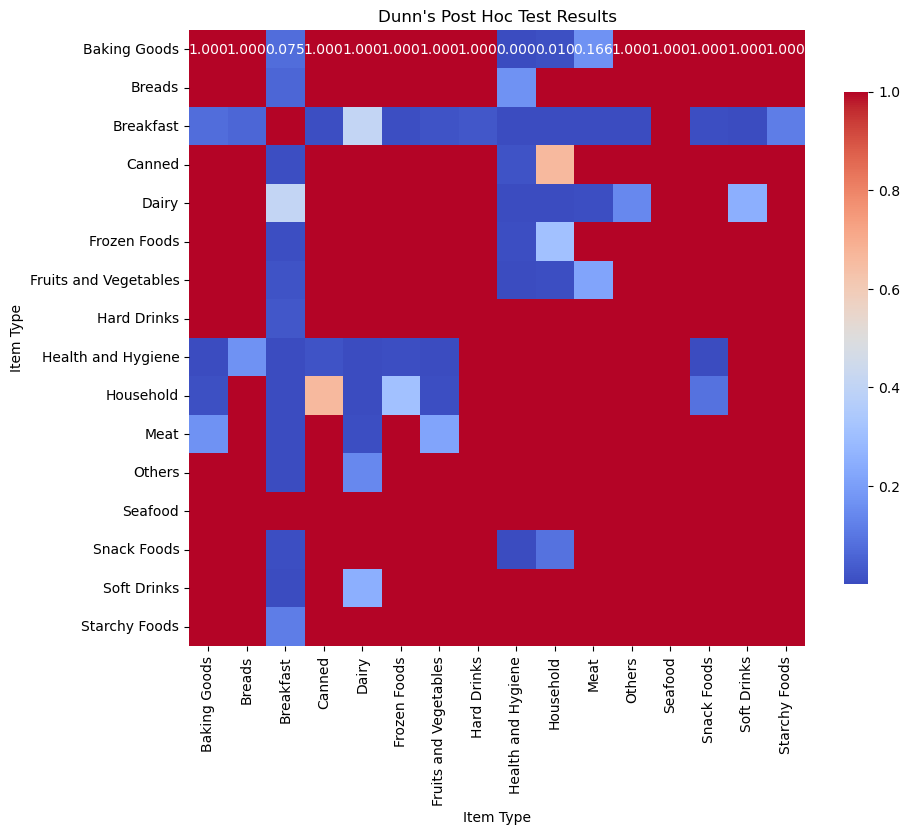

In [414]:
import scikit_posthocs as sp
# Perform Dunn's Test
posthoc_results = sp.posthoc_dunn(a, val_col='Item_Visibility', group_col='Item_Type', p_adjust='holm')
print(posthoc_results)

plt.figure(figsize=(10, 8))
sns.heatmap(posthoc_results, annot=True, cmap='coolwarm', fmt=".3f", square=True, cbar_kws={"shrink": .8})
plt.title("Dunn's Post Hoc Test Results")
plt.xlabel("Item Type")
plt.ylabel("Item Type")
plt.show()

# PROBLEM STATEMENT 2ND:  Investigate whether the outlet size (small, medium, large) influences item visibility.

## Null Hypothesis : There is no significant difference in item visibility across different outlet sizes.

## Alternative Hypothesis : There is a significant difference in item visibility across different outlet sizes.

In [415]:
# null hypothesis : data is normally ditributed.
# alternative hypothesis: data is not normally distributed.


# (by shapiro-wilk test)we check the normality or variance of these features in our data set. 
for outlet_size in a['Outlet_Size'].unique():
    stat, p_value = stats.shapiro(a[a['Outlet_Size'] == outlet_size]['Item_Visibility'])
    if p_value < 0.05:
        print(f"{outlet_size}: reject the null hypothesis: {p_value} ")
    else:
        print(f"{outlet_size}: fail to reject the null hypothesis:  {p_value}")


0.0: reject the null hypothesis: 1.9201270430560047e-33 
-1.0: reject the null hypothesis: 4.3876282307573775e-35 
2.0: reject the null hypothesis: 9.037069684294296e-20 
1.0: reject the null hypothesis: 1.6074856548902232e-36 


In [416]:
from scipy.stats import kruskal
groups = [a[a['Outlet_Size'] == cat]['Item_Visibility'] for cat in a['Outlet_Size'].unique()]
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic = {h_stat}, p-value = {p_value}")

Kruskal-Wallis H-statistic = 47.72178126923674, p-value = 2.440481968021235e-10


observation: our value of kruskal-wallis H -stat (47.67066...)is a large value. which indicate notable  diff between the groups.

remember if our p-value < 0.05. we reject the null hypothesis.

and in this the value of p is (4.45088..) which is far below the standard significance level of 0.05. this indicates that the diff in item visibility across diff outlet sizes (s,m,h)is statistically significant. It is highly unlikely that these diff are due to random chance.

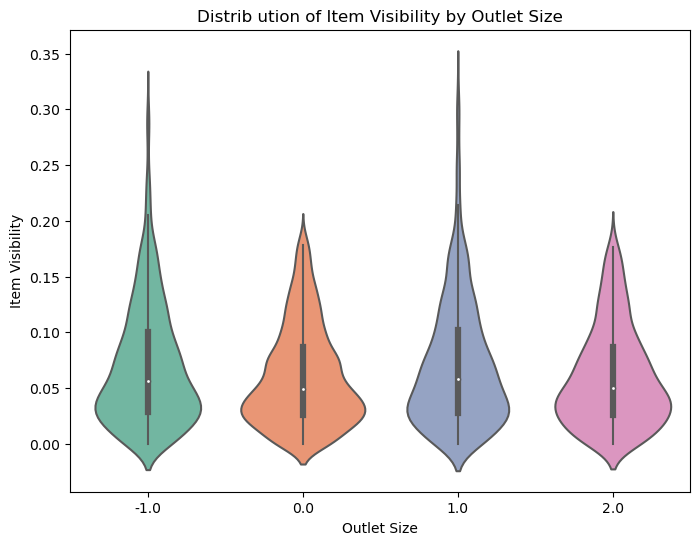

In [417]:
# lets visualize this 🎻.
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outlet_Size', y='Item_Visibility', data=a, palette='Set2')

plt.title('Distrib ution of Item Visibility by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Item Visibility')
plt.show()

after analyzing the outlet size and item visibility has an influence on each other. let's dig into a little more deeper.

this time we explore outlet size specifically diff from one another.
how a high outlet diff from the smaller one.

and for this purpose we perform a post-hoc test.
we use post-hoc test such as (Tukey's HSD) because this allow us to make pairwise comparison btw the groups and see which size have significantly diff visibility.

In [418]:
import scikit_posthocs as sp

# Perform Dunn's Test for post-hoc analysis
posthoc_dunn = sp.posthoc_dunn(a, val_col='Item_Visibility', group_col='Outlet_Size', p_adjust='holm')

print(posthoc_dunn)


              -1.0           0.0           1.0       2.0
-1.0  1.000000e+00  6.694733e-07  1.000000e+00  0.000295
 0.0  6.694733e-07  1.000000e+00  2.349370e-07  1.000000
 1.0  1.000000e+00  2.349370e-07  1.000000e+00  0.000198
 2.0  2.951738e-04  1.000000e+00  1.975098e-04  1.000000


high vs medium: p_value=0.924742
p > 0.05 -- this indicates no singni diff.

high vs small: P_value=0.000036
p < 0.05 -- this indicates a signi diff.

medium vs small:p_value= 9.158223e-10
p < 0.05 -- this indicates a signifi diff.

# PROBLEM STATEMENT 3rd: Analyze if the Maximum Retail Price (MRP) of items has a correlation with their visibility.

## Null Hypothesis : There is no correlation between item MRP and item visibility.

## Alternative Hypothesis : There is a correlation between item MRP and item visibility.

In [419]:
# item mrp and item visibility are not normally distributed.
# p_ value 5.994479054843788e-38 <0.05
from scipy.stats import spearmanr

correlation, p_value = spearmanr(a['Item_MRP'], a['Item_Visibility'])

print(f"Spearman Correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman Correlation: 0.006458197959954461
P-value: 0.5511516709274845


formula : p(row)=1-6 summation d square ,suffix i / n(n2-1)
here di is the difference between the ranks of corresponding values of two variables, and (n) is sample size.


obseravation: our p-value is  (0.55133..) > 0.05 .which is much larger than the typical threshold of (0.05), meaning relationship between item MRP and item visibility is likely due to random chance. 

and our correlation coefficient is (0.0064) which is very close to 0. meaning there is almost no correlation between these two variables.


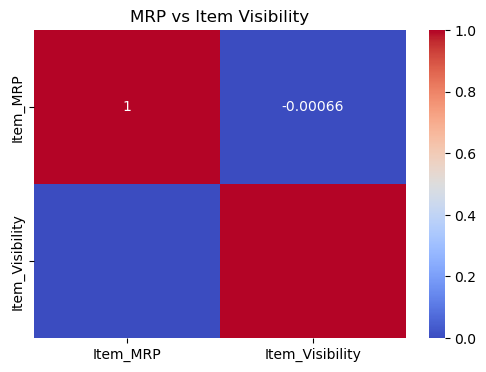

In [420]:
# Correlation matrix
corr_matrix = a[['Item_MRP', 'Item_Visibility']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('MRP vs Item Visibility')
plt.show()

# PROBLEM STATEMENT 4rd: Is there a relationship between Item Visibility and Outlet Location Type?

## Null Hypothesis : There is no significant difference in the mean item visibility across different outlet location types (e.g., Tier 1, Tier 2, Tier 3 cities).

## Alternative Hypothesis : There is a significant difference in the mean item visibility across different outlet location types.

In [421]:
# null hypothesis: our feature outlet location type is normally distributed.
# Alternative hypothesis: our feature outlet location type is not normally distributed.


# (by Shapiro-Wilk test)we check the normality or variance of these features in our data set. than further apply any hypothesis test. 
for item_type in a['Outlet_Location_Type'].unique():
    stat, p_value = stats.shapiro(a[a['Outlet_Location_Type'] == item_type]['Item_Visibility'])
    alpha=0.05
    if p_value < alpha:
        print(f"{item_type}: reject the null hypothesis: {p_value} < {alpha}")
    else:
        print(f"{item_type}:fail to reject the null hypothesis: {p_value} > {alpha}")


Tier 1: reject the null hypothesis: 7.262323234412413e-37 < 0.05
Tier 3: reject the null hypothesis: 5.699234997240107e-40 < 0.05
Tier 2: reject the null hypothesis: 9.676338888182902e-33 < 0.05


In [422]:
# Our feature is not normally distributed. we apply non-parametric test.

In [423]:
import scikit_posthocs as sp

# Perform Kruskal-Wallis Test
kruskal_result = stats.kruskal(*[a[a['Outlet_Location_Type'] == loc]['Item_Visibility'] for loc in a['Outlet_Location_Type'].unique()])
print(f"Kruskal-Wallis Test: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")

# If significant, perform Dunn's post hoc test
if kruskal_result.pvalue < 0.05:
    posthoc_dunn = sp.posthoc_dunn(a, val_col='Item_Visibility', group_col='Outlet_Location_Type', p_adjust='holm')
    print(posthoc_dunn)


Kruskal-Wallis Test: H-statistic = 21.82726079246274, p-value = 1.820834784511236e-05
          Tier 1    Tier 2    Tier 3
Tier 1  1.000000  0.000011  0.042030
Tier 2  0.000011  1.000000  0.007378
Tier 3  0.042030  0.007378  1.000000


# There is a statistically significant difference in item visibility across the different outlet location types (Tier 1, Tier 2, Tier 3).

## Tier 1 vs Tier 2:
## p-value = 0.000011 (significant)
## This indicates a significant difference in item visibility between Tier 1 and Tier 2 locations.


## Tier 1 vs Tier 3:
## p-value = 0.042030 (significant)
## There is a significant difference in item visibility between Tier 1 and Tier 3, but it's less strong compared to Tier 1 vs Tier 2.


## Tier 2 vs Tier 3:
## p-value = 0.007378 (significant)
## There is a significant difference between Tier 2 and Tier 3


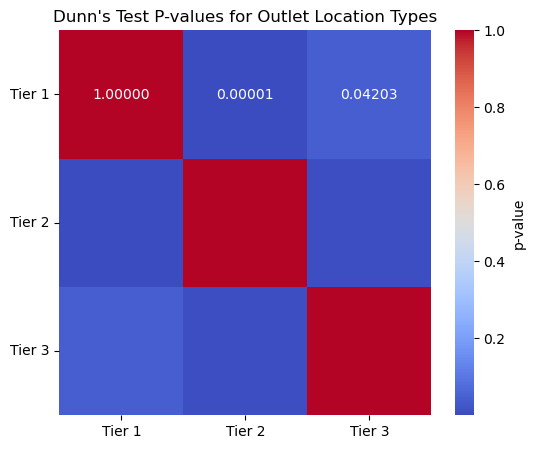

In [424]:
plt.figure(figsize=(6, 5))
sns.heatmap(posthoc_dunn, annot=True, fmt=".5f", cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title("Dunn's Test P-values for Outlet Location Types")
plt.yticks(rotation=0)
plt.show()

# PROBLEM STATEMENT 5th: Is there a difference in Item Visibility based on Item Fat Content?

# null hypothesis: there is diff in item fat content and item visibility.

# alternative hypothesis: there is no diff in item fat content and item visibility.

In [425]:
Numerical_features=[col for col in a.columns if a.dtypes[col] != "object"]
Numerical_features

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Age',
 'Outlet_Size',
 'Item_Outlet_Sales']

In [426]:
from scipy.stats import shapiro

for column in Numerical_features:  
    stat, p_value = shapiro(a[column])
    if p_value > 0.05:
        print(f'{column}: Normally distributed (p-value = {p_value})')
    else:
        print(f'{column}: Not normally distributed (p-value = {p_value})')

Item_Weight: Not normally distributed (p-value = 0.0)
Item_Visibility: Not normally distributed (p-value = 0.0)
Item_MRP: Not normally distributed (p-value = 5.994479054843788e-38)
Outlet_Age: Not normally distributed (p-value = 0.0)
Outlet_Size: Not normally distributed (p-value = 0.0)
Item_Outlet_Sales: Not normally distributed (p-value = 1.72918892035814e-20)


In [427]:
from scipy.stats import kruskal

groups = [a[a['Item_Fat_Content'] == cat]['Item_Visibility'] for cat in a['Item_Fat_Content'].unique()]
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic = {h_stat}, p-value = {p_value}")


Kruskal-Wallis H-statistic = 23.975924207158073, p-value = 9.754790860889084e-07


# Train test Splite

In [428]:
from sklearn.model_selection import train_test_split

In [429]:
traindf,testdf=train_test_split(dataStd,train_size=0.8,random_state=1324)

In [430]:
trainX=traindf.drop("Item_Visibility",axis=1)
trainY=traindf["Item_Visibility"]
testX=testdf.drop("Item_Visibility",axis=1)
testY=testdf["Item_Visibility"]

In [431]:
trainX

,Item_Weight,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Fat_Content_Regular
7978,-1.709266,0.419703,1.533750,-0.221352,-1.091990,-1.184539,1.857086,-0.174225,-0.114366,-0.287149,...,-0.350465,-0.349197,-0.349620,-0.257033,2.853354,-0.350042,-0.349831,-0.350042,-0.350042,1.354723
1192,-0.811687,-0.303298,-0.019549,-1.245197,-1.091990,-2.102102,-1.968336,-0.174225,-0.114366,-0.287149,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,-0.738158
404,-1.709266,-0.411307,1.533750,-0.221352,-1.091990,-1.184539,0.326597,-0.174225,-0.114366,-0.287149,...,-0.350465,-0.349197,-0.349620,-0.257033,2.853354,-0.350042,-0.349831,-0.350042,-0.350042,1.354723
3967,-1.709266,0.733075,1.533750,-0.221352,-1.091990,-1.184539,1.486838,-0.174225,-0.114366,3.482512,...,-0.350465,-0.349197,-0.349620,-0.257033,2.853354,-0.350042,-0.349831,-0.350042,-0.350042,1.354723
4914,0.761679,0.476391,1.294781,1.826338,-1.091990,0.650587,1.891722,-0.174225,-0.114366,-0.287149,...,2.853354,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,1.354723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,-0.647950,-0.495811,-0.139034,-0.221352,1.368996,0.650587,-0.056015,-0.174225,-0.114366,-0.287149,...,-0.350465,-0.349197,-0.349620,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,2.856797,-0.738158
6943,-1.709266,0.761948,1.533750,-0.221352,-1.091990,-1.184539,1.504182,-0.174225,-0.114366,-0.287149,...,-0.350465,-0.349197,-0.349620,-0.257033,2.853354,-0.350042,-0.349831,-0.350042,-0.350042,-0.738158
2799,-1.709266,-1.369052,1.533750,0.802493,1.368996,-2.102102,-1.828384,-0.174225,-0.114366,-0.287149,...,-0.350465,-0.349197,-0.349620,3.890548,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,-0.738158
7661,-0.676232,0.756579,-1.333880,-0.221352,-1.091990,-0.266976,-0.614128,5.739706,-0.114366,-0.287149,...,-0.350465,-0.349197,2.860251,-0.257033,-0.350465,-0.350042,-0.349831,-0.350042,-0.350042,1.354723


# Model Building

# Error check

In [432]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

In [433]:
def error(testY,trainpredict):
    mse=mean_squared_error(testY,trainpredict)
    me=np.sqrt(mean_squared_error(testY,trainpredict))
    mape=mean_absolute_percentage_error(testY,trainpredict)
    print(f"Mean Square Error: {mse}\nMean Error: {me}\nMean Absolute Percentage Error: {mape}")
     
    error=testY-trainpredict
    fig, axes = plt.subplots(1, 2, figsize = (18, 5))
    sns.histplot(ax=axes[0],x=error,kde=True)
    sns.scatterplot(ax=axes[1],x=trainpredict,y=error)
    return mse,me,mape

## LINEAR REGRESSION

In [434]:
from sklearn.linear_model import LinearRegression

In [435]:
lr=LinearRegression().fit(trainX,trainY)

In [436]:
trainpredict=lr.predict(testX)

In [437]:
trainpredict#[0:5]

array([-0.27304426, -0.12509504, -0.08359113, ..., -0.24374738,
       -0.2120091 ,  0.04034234])

Mean Square Error: 0.9175381244790176
Mean Error: 0.9578821036427279
Mean Absolute Percentage Error: 1.684828741876149


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


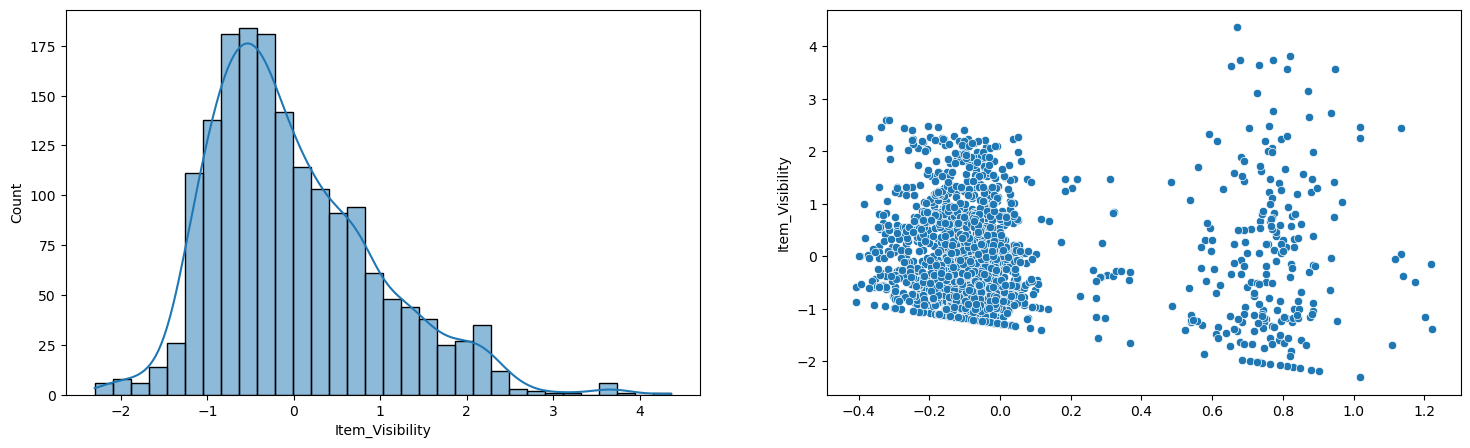

In [438]:
LR=error(testY,trainpredict)

 # Decision Tree Regressor  

Mean Square Error: 0.9154212866308625
Mean Error: 0.956776508193456
Mean Absolute Percentage Error: 2.5608322569076987


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5083912037037037, 0.9722222222222222, 'Outlet_Type <= -1.643\nsquared_error = 0.998\nsamples = 6816\nvalue = 0.002'), Text(0.24305555555555555, 0.9166666666666666, 'Item_MRP <= -1.366\nsquared_error = 2.093\nsamples = 867\nvalue = 0.745'), Text(0.21342592592592594, 0.8611111111111112, 'squared_error = 2.348\nsamples = 114\nvalue = 1.004'), Text(0.2726851851851852, 0.8611111111111112, 'Item_MRP <= 0.22\nsquared_error = 2.043\nsamples = 753\nvalue = 0.706'), Text(0.21342592592592594, 0.8055555555555556, 'Item_Outlet_Sales <= -1.855\nsquared_error = 2.029\nsamples = 382\nvalue = 0.592'), Text(0.1837962962962963, 0.75, 'squared_error = 1.533\nsamples = 133\nvalue = 0.474'), Text(0.24305555555555555, 0.75, 'Item_Outlet_Sales <= -1.518\nsquared_error = 2.283\nsamples = 249\nvalue = 0.655'), Text(0.21342592592592594, 0.6944444444444444, 'squared_error = 2.353\nsamples = 117\nvalue = 0.793'), Text(0.2726851851851852, 0.6944444444444444, 'squared_error = 2.189\nsamples = 132\nvalue = 0.

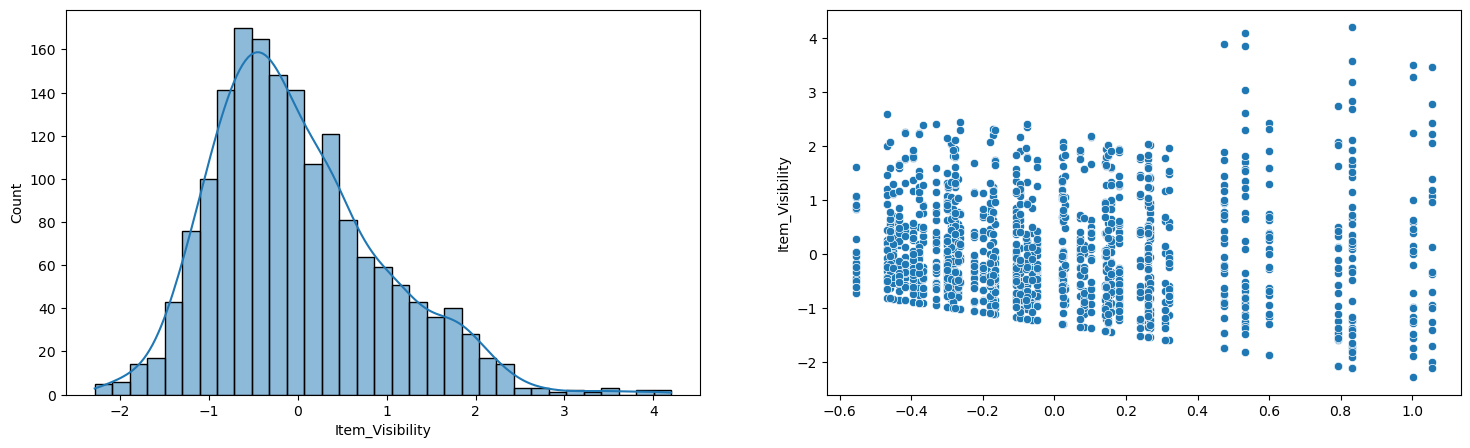

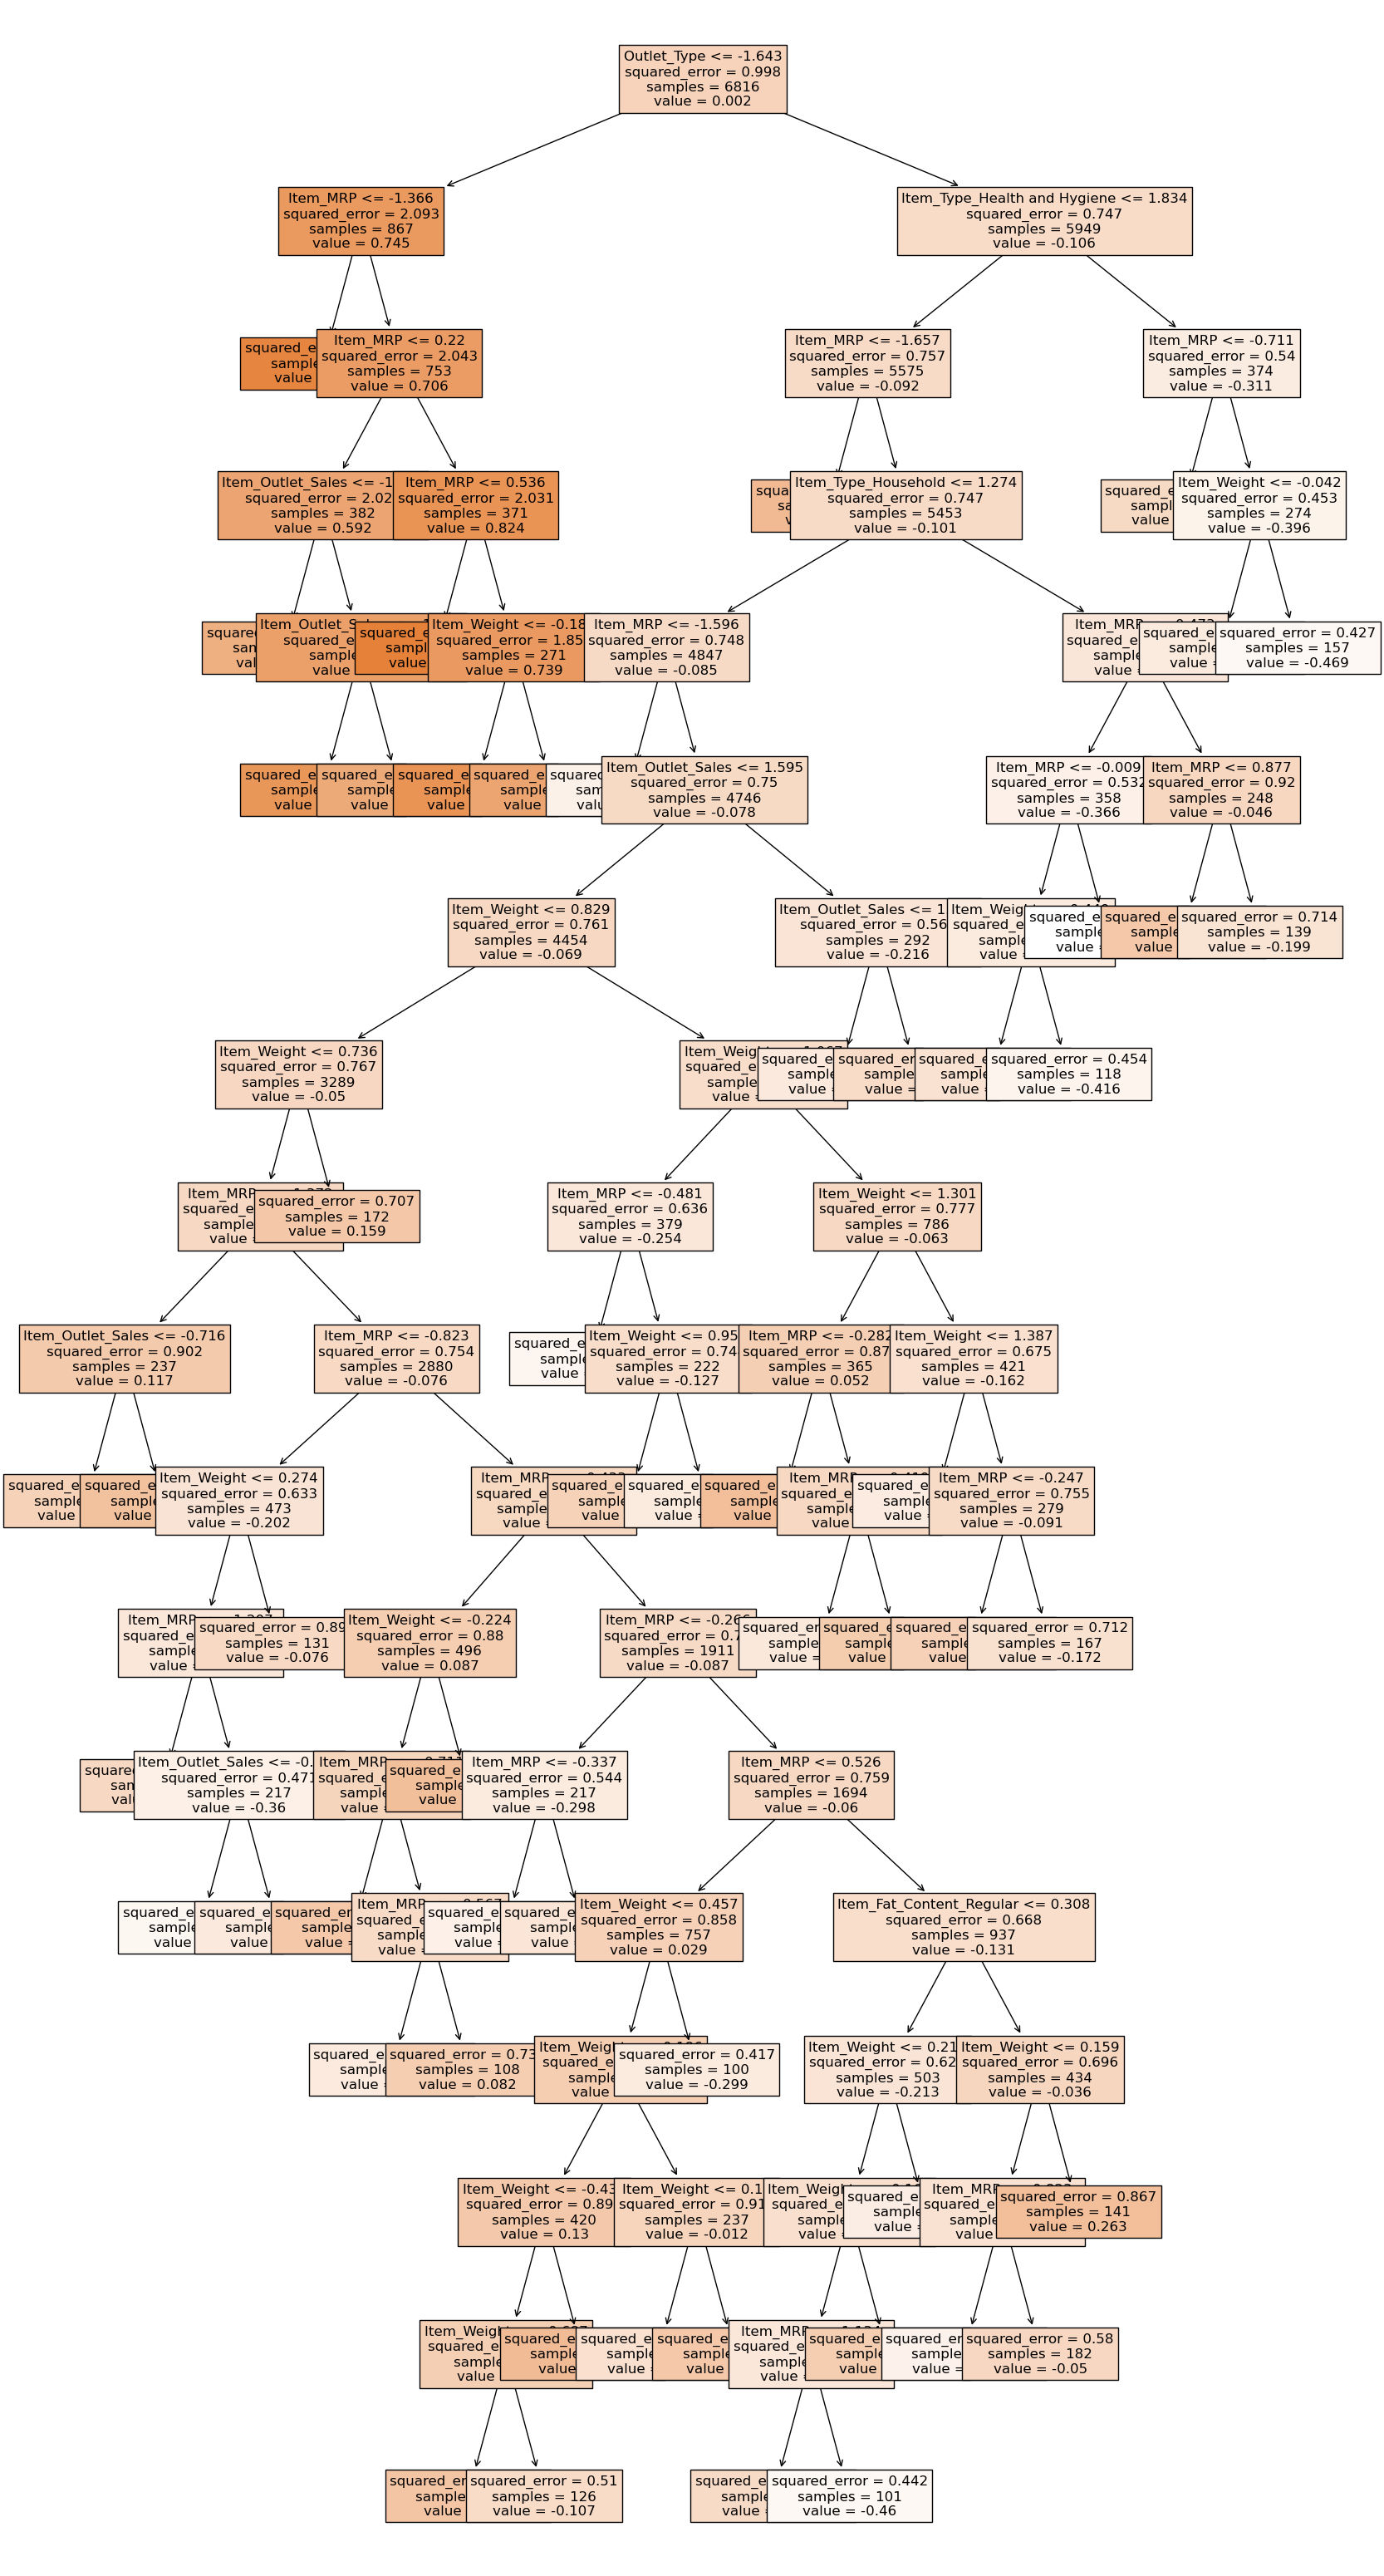

In [439]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr = DecisionTreeRegressor(min_samples_leaf=100,random_state = 1245) 
dtr.fit(trainX,trainY)
trainpredict=dtr.predict(testX)
DTR=error(testY,trainpredict)
plt.figure(figsize=(20,40))
print(plot_tree(dtr,fontsize=12,feature_names=trainX.columns,filled=True))

# hyperparameter tunning

In [440]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


param_grid = {"max_depth": [3, 5, 10, 15, 20, 25, 30],
            "min_samples_split": [10, 20, 50, 100],
            "min_samples_leaf": [5, 10, 20, 50, 100]
             }


In [441]:
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error').fit(trainX, trainY)

grid_search

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [442]:
grid_search.cv_results_

{'mean_fit_time': array([0.03549457, 0.01240959, 0.01806006, 0.01259365, 0.01019197,
        0.00893054, 0.00864301, 0.00952644, 0.01002007, 0.01013284,
        0.00904479, 0.00983939, 0.00956397, 0.00951552, 0.00831604,
        0.00945635, 0.0108736 , 0.00985613, 0.01010718, 0.00872779,
        0.01588478, 0.01598191, 0.00889387, 0.00490022, 0.01568089,
        0.01377854, 0.01679406, 0.01960192, 0.01373596, 0.00525293,
        0.01114912, 0.01471834, 0.01636682, 0.01299891, 0.01575642,
        0.01139345, 0.01299863, 0.01361217, 0.01388221, 0.01398602,
        0.02692151, 0.02394409, 0.02320471, 0.02090697, 0.02150836,
        0.02229223, 0.02838407, 0.02376456, 0.02115622, 0.02316418,
        0.02212176, 0.02276583, 0.02048159, 0.01929278, 0.02243123,
        0.01917753, 0.02004232, 0.02029014, 0.02012172, 0.01701369,
        0.03177476, 0.02263198, 0.02580743, 0.0264935 , 0.02451429,
        0.0280426 , 0.02635274, 0.02282238, 0.02306905, 0.02625203,
        0.02455397, 0.02300844,

In [443]:
grid_search_DF=pd.DataFrame(grid_search.cv_results_)

In [444]:
grid_search_DF.to_csv(r"C:\Users\SHIVAM CHINDALIA\Downloads\ML VID RECORDING\grid_search_DF.csv")

In [445]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 10}

In [446]:
grid_search.best_estimator_ 

DecisionTreeRegressor(max_depth=10, min_samples_leaf=100, min_samples_split=10)

In [447]:
#  (testX, testY)
best_model = grid_search.best_estimator_

# Make predictions on the test set
test_predictions = best_model.predict(testX)

# Calculate evaluation metrics ( Mean Squared Error)
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(testY, test_predictions)
print("Test Mean Squared Error:", test_mse)

# Optional, calculate R² score
from sklearn.metrics import r2_score
test_r2 = r2_score(testY, test_predictions)
print("Test R² Score:", test_r2)


Test Mean Squared Error: 0.912077429299188
Test R² Score: 0.09366827023540136
